In [1]:
# Standard Libraries
import os
import numpy as np 
import pandas as pd 
import random as rn
# import cv2
import torch
import torch.nn as nn
from torch.utils.data import Dataset

# Visualization libraries
# import pydotplus
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style({"axes.facecolor": ".95"})

# Modeling and Machine Learning
from IPython.display import Image 
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
# from sklearn.externals.six import StringIO  
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree, export_text
# from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# import pip install tensorflow as tf
from joblib import dump, load

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from copy import deepcopy

# Seed for reproducability
seed = 1024
np.random.seed(seed)
rn.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [2]:
def acc(y_true : np.ndarray, y_pred : np.ndarray) -> float:
    """
        Calculates the accuracy score between labels and predictions.
        
        :param y_true: The true labels of the data
        :param y_pred: The predictions for the data
        
        :return: a floating point number denoting the accuracy
    """
    return np.round(accuracy_score(y_true, y_pred) * 100, 2)

In [3]:
# dataset = pd.read_csv('../Dataset/connect4/c4_game_database.csv')
# dataset = pd.read_csv('../Dataset/connect4/connect-4.data')
# dataset = pd.read_csv('../Dataset/heart.csv')
# dataset = pd.read_csv('../Dataset/Acoustic_Extinguisher_Fire_Dataset.csv')
dataset = datasets.load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# X = dataset.drop('STATUS', axis = 1)
# y = dataset['STATUS']

# X = dataset.iloc[:,:-1]
# y = dataset.iloc[:, -1]

X = dataset.data
y = dataset.target

In [5]:
X = (X-X.min(0)-0.5*(X.max(0)-X.min(0)))/(X.max(0)-X.min(0))*2
# X = (X-X.min()-0.5*(X.max()-X.min()))/(X.max()-X.min())*2

In [6]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=0.2,random_state=seed)
# random——seed: 42,37
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [7]:
# Train baseline decision tree model

best_depth = 3
clf = DecisionTreeClassifier(max_depth=best_depth,random_state=seed)
clf.fit(X_train, y_train)

clf_rf = RandomForestClassifier(300, min_samples_leaf=3, criterion="gini")
clf_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, n_estimators=300)

In [8]:

rf_preds_baseline = clf_rf.predict(X_test)
train_preds_baseline = clf.predict(X_train)
val_preds_baseline = clf.predict(X_test)
acc_baseline_train = acc(train_preds_baseline, y_train)
acc_baseline_val = acc(val_preds_baseline, y_test)
acc_baseline_rf = acc(rf_preds_baseline, y_test)
print(f'Training accuracy for our baseline (using all pixel features): {acc_baseline_train}%')
print(f'Validation accuracy for our baseline (using all pixel features): {acc_baseline_val}%')
print(f'Validation accuracy for our teacher rf model (using all pixel features): {acc_baseline_rf}%')

Training accuracy for our baseline (using all pixel features): 96.67%
Validation accuracy for our baseline (using all pixel features): 100.0%
Validation accuracy for our teacher rf model (using all pixel features): 100.0%


In [9]:
test_rep = export_text(clf)
print(test_rep)

|--- feature_3 <= -0.42
|   |--- class: 0
|--- feature_3 >  -0.42
|   |--- feature_3 <= 0.38
|   |   |--- feature_2 <= 0.34
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.34
|   |   |   |--- class: 2
|   |--- feature_3 >  0.38
|   |   |--- feature_2 <= 0.31
|   |   |   |--- class: 2
|   |   |--- feature_2 >  0.31
|   |   |   |--- class: 2



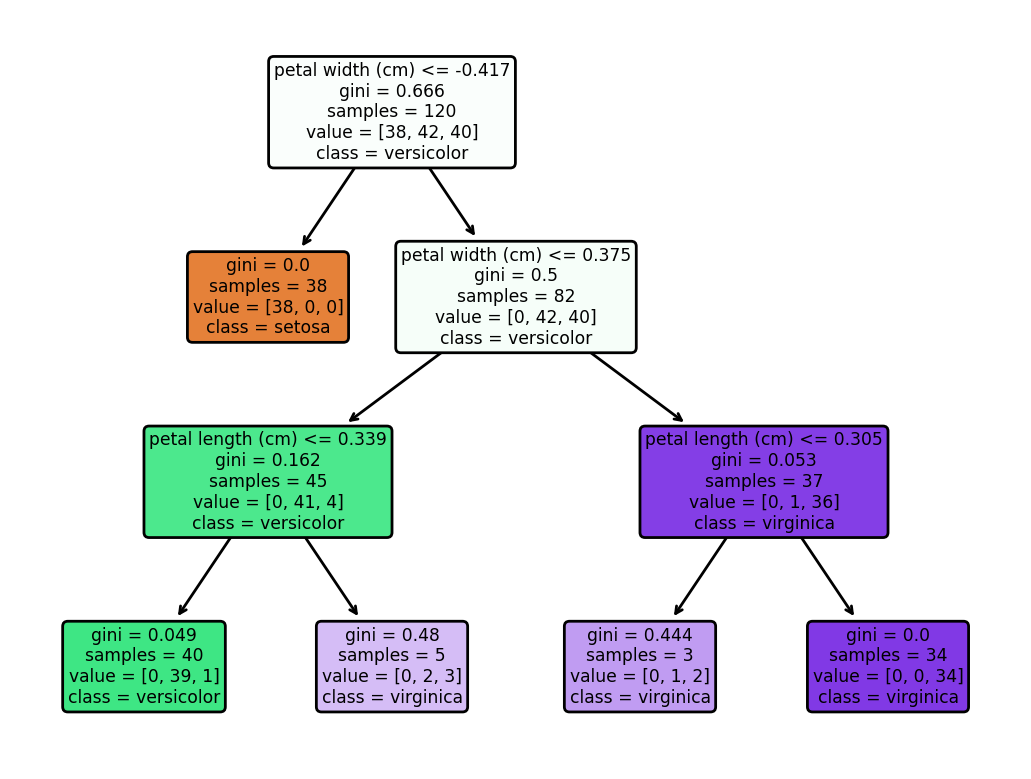

In [10]:
fig = plt.figure(dpi=200)
_ = plot_tree(clf,feature_names=dataset.feature_names,class_names=['setosa', 'versicolor', 'virginica'],rounded=True,filled=True)

# plt.savefig('tree_plot.png',transparent=True)

In [11]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
max_depth = clf.tree_.max_depth

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)



is_leaves = np.zeros(shape=n_nodes, dtype=bool)
node_path = np.zeros(shape=[n_nodes,max_depth+1], dtype=np.int64)
left_right = np.zeros(shape=[n_nodes,max_depth+1], dtype=np.int64)

stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

depth = 0
for i in range(n_nodes):
    previous_depth = depth
    depth = node_depth[i]
    
    if i!=0:
        node_path[i, :depth] = node_path[i-1, :depth]
        left_right[i, :depth] = left_right[i-1, :depth]
    node_path[i, depth] = i
    if depth>previous_depth:
        left_right[i, depth] = 0
    else:
        left_right[i, depth] = 1

    
node_path_left_right = np.concatenate((node_path[:,:-1,np.newaxis],left_right[:,1:,np.newaxis]),axis = 2) 
node_path_left_right = node_path_left_right[clf.tree_.feature==-2]
node_path = node_path_left_right[:,:,0]

In [12]:
class SDT(nn.Module):


    def __init__(self, clf,node_depth,node_path_left_right, args):
        super(SDT, self).__init__()
        self.args = args
        self.clf = clf
        self.device = torch.device("cuda" if self.args['use_cuda'] else "cpu")
        self.leaf_num = clf.tree_.n_leaves
        self.inner_node_num = clf.tree_.node_count - clf.tree_.n_leaves
        self.leaf_index = clf.tree_.feature==-2
        self.inner_node_index = clf.tree_.feature!=-2
        

        self.feature_index = clf.tree_.feature[self.inner_node_index]
        self.left_nodes = clf.tree_.children_left
        self.right_nodes = clf.tree_.children_right
        self.node_depth = node_depth
        self.leaf_depth = node_depth[self.leaf_index]
        self.inner_node_depth = node_depth[self.inner_node_index]
        self.node_path = node_path_left_right[:,:,0]
        self.node_path_left_right = node_path_left_right
        # self.node_gain = nn.Parameter(data=torch.ones(1,clf.tree_.node_count)*(-10),requires_grad=True)
        
        self.node_gain = nn.Parameter(data=torch.ones(node_path_left_right[:,:,0].shape)*(-10),requires_grad=False)
        
        
        # self.sign = nn.Parameter(data=torch.rand(self.leaf_num,self.inner_node_num),requires_grad=True)
        # self.node_threshold = nn.Parameter(data=torch.tensor(clf.tree_.threshold[self.inner_node_index]).view(1,-1),requires_grad=True)
        # self.node_threshold = nn.Parameter(data=torch.matmul(torch.ones([self.leaf_num,1],dtype=torch.float), torch.tensor(clf.tree_.threshold[self.inner_node_index],dtype=torch.float).view(1,-1)),requires_grad=True)
        
        self.node_threshold = nn.Parameter(torch.tensor(clf.tree_.threshold[self.node_path],dtype=torch.float),requires_grad=True)
        
        self.register_parameter('node_gain',self.node_gain)
        self.register_parameter('node_threshold',self.node_threshold)


        # Different penalty coefficients for nodes in different layers
        self.penalty_list = [
            self.args['lamda'] * (2 ** (-depth)) for depth in range(0, self.args['depth'])
        ]


        self.leaf_nodes = nn.Parameter(data = torch.tensor(clf.tree_.value[self.leaf_index,0,:]), requires_grad = True)
        self.register_parameter('leaf_node',self.leaf_nodes)
        
        self.dropout = nn.Dropout(0.25)
        # self.leaf_nodes = []
        # for i in range(self.leaf_num):
        #     leaf_distribution = nn.Parameter(data=torch.tensor(clf.tree_.value[(clf.tree_.feature==-2)][i]))
        #     self.leaf_nodes.append(leaf_distribution)
        #     self.register_parameter('Leaf-{}'.format(i), leaf_distribution) # register parameters


    def forward(self, X, is_training_data=False):


        _mu, _penalty = self._forward(X)
        # print(_mu[0])
        # output = torch.zeros(X.size()[0], self.args['output_dim']).to(self.device)
        # for i in range(self.leaf_num):
        #     output += torch.matmul(_mu[:, i].view(-1, 1), torch.softmax(self.leaf_nodes[i,:], dim=1).to(self.device))

        # cal by sum or max
        # 
          
        # output = torch.softmax(self.leaf_nodes[torch.max(_mu,1).indices,:].to(self.device),dim=1)

        # output = torch.softmax(output,dim=1)       
        # torch.cuda.empty_cache()

        if is_training_data:
            output = torch.matmul(_mu, torch.softmax(self.leaf_nodes.to(self.device,torch.float),dim=1))
            # output = torch.softmax(output,dim=1)
            # output = torch.softmax(self.leaf_nodes[torch.max(_mu,1).indices,:].to(self.device),dim=1)  
            return torch.log(output+1e-18),_penalty
        else:
            # output = torch.matmul(_mu, torch.softmax(self.leaf_nodes.to(self.device),dim=1))  
            output = torch.softmax(self.leaf_nodes[torch.max(_mu,1).indices,:].to(self.device),dim=1)
            # print(output.shape)
            return torch.log(output+1e-18)

        # When `X` is the training data, the model also returns the penalty
        # to compute the training loss.


    def _forward(self, X):
        """Implementation on the data forwarding process."""
        


        batch_size = X.size()[0]

        # X = X[:,self.node_path]
        X = X[:,self.clf.tree_.feature[self.node_path]]
        # print(self.node_gain)
        # print([self.node_path])
        # print(X.shape)
        # gain = self.node_gain[0][self.node_path].to(self.device)
        gain = self.node_gain.to(self.device)




        # X = torch.matmul(torch.ones([batch_size, self.leaf_num, 1]).to(self.device), X[:,self.feature_index].view(batch_size,1,-1) )
        # gain = torch.matmul(torch.ones([self.leaf_num, 1]) , self.node_gain ).to(self.device)
        X = (X  - self.node_threshold.to(self.device)) * gain

        X = self.dropout(X)

        path_prob = torch.sigmoid(X)
        path_prob = torch.unsqueeze(path_prob, dim=3)
        path_prob = torch.cat((path_prob, 1 - path_prob), dim=3)

        # X = self.dropout(X)
        # mu = torch.prod(path_prob,-1)


        # path_prob = self.inner_nodes(X)

        # path_prob_all = path_prob.data.new(X.shape[0],self.leaf_num, len(self.left_nodes)).fill_(1.0)
        
        # path_prob_all[:,:,self.inner_node_index] = path_prob

        # path_prob_all = torch.unsqueeze(path_prob_all, dim=3)
        # path_prob_all = torch.cat((path_prob_all, 1 - path_prob_all), dim=3)



        # # _mu = X.data.new(batch_size, 1, 1).fill_(1.0)
        _mu = X.data.new(batch_size, self.leaf_num).fill_(1.0)

        for layer_idx in range(1, self.args['depth']+1):
            select_leaf = self.leaf_depth==layer_idx
            if sum(select_leaf) > 0:
                mu_temp = path_prob[:,select_leaf,:layer_idx,:]
                mu_temp_index = torch.argwhere(mu_temp[0,:,:,0])
                mu_temp = mu_temp[:,mu_temp_index[:,0].reshape(mu_temp[0,:,:,0].shape),mu_temp_index[:,1].reshape(mu_temp[0,:,:,0].shape),node_path_left_right[select_leaf,:layer_idx,1]]
                
                _mu[:,select_leaf] = torch.prod(mu_temp,-1)


        

        _penalty = torch.tensor(0.0)

        # Iterate through internal odes in each layer to compute the final path
        # probabilities and the regularization term.
        # begin_idx = 0
        # end_idx = 1
        # index_inner_node = 0
        # for node_idx in range(0, len(self.left_nodes)):

        #     if self.left_nodes[node_idx] != -1:
                
        #         _mu[:,self.left_nodes[node_idx]] = path_prob[:,index_inner_node, 0] * _mu[:,node_idx].clone()
                
        #         _mu[:,self.right_nodes[node_idx]] = path_prob[:,index_inner_node, 1] * _mu[:,node_idx].clone()

        #         index_inner_node = index_inner_node + 1
            




        # leaf_index = torch.matmul(torch.arange(self.leaf_num).view(-1,1),torch.ones([1,self.args['depth']],dtype=torch.long))
        
        # sum_leaf = 0
        # for layer_idx in range(1, self.args['depth']+1):

        #     select_leaf = self.leaf_index & (self.node_depth==layer_idx)

        #     if sum(select_leaf) > 0:
                
        #         _mu[:,select_leaf] = torch.prod(path_prob_all[:,leaf_index[sum_leaf:sum_leaf+sum(select_leaf),:], self.node_path[select_leaf,:,0],self.node_path[select_leaf,:,1]],-1)
        #         sum_leaf = sum_leaf + sum(select_leaf)








        #     # Extract internal nodes in the current layer to compute the
        #     # regularization term
        #     # _penalty = _penalty + self._cal_penalty(layer_idx, _mu, _path_prob)
            # _penalty = torch.tensor(0.0)
            # _mu = _mu.view(batch_size, -1, 1).repeat(1, 1, 2)

            # _mu = _mu * _path_prob  # update path probabilities

            # begin_idx = end_idx
            # end_idx = begin_idx + 2 ** (layer_idx + 1)

        # mu = _mu.view(batch_size, self.leaf_num)
        # mu = _mu[:,self.leaf_index]

        return _mu, _penalty

    def _cal_penalty(self, layer_idx, _mu, _path_prob):
        """
        Compute the regularization term for internal nodes in different layers.
        """

        penalty = torch.tensor(0.0)

        batch_size = _mu.size()[0]
        _mu = _mu.view(batch_size, -1)
        _path_prob = _path_prob.view(batch_size,-1)

        for node in range(0, _path_prob.shape[1]):
            alpha = torch.sum(
                _path_prob[:, node] * _mu[:, node // 2], dim=0
            ) / torch.sum(_mu[:, node // 2], dim=0)

            coeff = self.penalty_list[layer_idx]

            penalty -= 0.5 * coeff * (torch.log(alpha) + torch.log(1 - alpha))

        return penalty

    def _data_augment(self, X):
        """Add a constant input `1` onto the front of each sample."""
        batch_size = X.size()[0]
        X = X.view(batch_size, -1)
        # bias = torch.ones(batch_size, 1).to(self.device)
        # X = torch.cat((bias, X), 1)

        return X

    def _validate_parameters(self):

        if not self.depth > 0:
            msg = ("The tree depth should be strictly positive, but got {}"
                   "instead.")
            raise ValueError(msg.format(self.depth))

        if not self.lamda >= 0:
            msg = (
                "The coefficient of the regularization term should not be"
                " negative, but got {} instead."
            )
            raise ValueError(msg.format(self.lamda))

In [13]:

class make_dataset(Dataset):
    def __init__(self, X, y):
        self.X_data = X
        self.y_data = y

    def __len__(self):
        return len(self.y_data)

    def __getitem__(self, idx):
        Y = self.y_data[idx,:]
        X = self.X_data[idx,:]
        return X, Y
# Y_train = to_categorical(y_train)
# Y_test = to_categorical(y_test)
# X_train = np.array(X_train)
# X_test = np.array(X_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train = torch.tensor(X_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
# y_train = torch.tensor(y_train)
# y_test  = torch.tensor(y_test)
# soft_label = y_train






In [14]:
# Parameters
args = {}
# args['input_dim'] = 7 * 7    # the number of input dimensions
args['output_dim'] = 3        # the number of outputs (i.e., # classes on MNIST)
args['input_dim'] = 4    # the number of input dimensions
args['depth'] = best_depth            # tree depth
args['lamda'] = 1e-5           # coefficient of the regularization term
args['lr'] = 1e-4              # learning rate 1e-3
args['weight_decaly'] = 5e-5     # weight decay 5e-5
args['batch_size'] = 20       # batch size
args['epochs'] = 1000           # the number of training epochs
args['log_interval'] = 100     # the number of batches to wait before printing logs
args['use_cuda'] = True       # whether to use GPU
tree = SDT(clf,node_depth,node_path_left_right,args)

# optimizer = torch.optim.SGD(tree.parameters(), lr=args['lr'], momentum=0.9)
optimizer = torch.optim.Adam(tree.parameters(), lr=args['lr'],weight_decay=args['weight_decaly'])
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if args['use_cuda'] else "cpu")
tree = tree.to(device)
best_testing_acc = 0.0
testing_acc_list = []
training_loss_list = []

In [15]:
train_loader = torch.utils.data.DataLoader(
        make_dataset(X = X_train,y = y_train),
        batch_size=args['batch_size'],
        shuffle=True,
    )
test_loader = torch.utils.data.DataLoader(
        make_dataset(X= X_train, y=y_train),
        batch_size=50,
        shuffle=False,
    )

In [61]:
for epoch in range(args['epochs']):
    
    # Training
    tree.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        
        batch_size = data.size()[0]
        data, target = data.to(device), target.to(device)
        tree = tree.to(device)
        
        # target_onehot = onehot_coding(target, device, args['output_dim'])
        # print(data.shape)
        output,penalty = tree.forward(data, is_training_data=True)
        # target = torch.argmax(target,1)
        # loss = criterion(output, target.view(-1))
        loss = criterion(output, target)
        # loss += penalty

        
        # torch.autograd.set_detect_anomaly(True)
        loss.backward()
        optimizer.step()

        # Print training status
        if batch_idx % args['log_interval'] == 0:
            pred = torch.argmax(output,1)
            correct = pred.eq(torch.argmax(target,1)).sum()
            # correct = pred.eq(target.view(-1).data).sum()

            msg = (
                "Epoch: {:02d} | Batch: {:03d} | Loss: {:.5f} |"
                " Correct: {:03d}/{:03d}"
            )
            print(msg.format(epoch, batch_idx, loss, correct, batch_size))
            training_loss_list.append(loss.cpu().data.numpy())

    # Evaluating
    tree.eval()
    correct = 0.
    with torch.no_grad():
        torch.cuda.empty_cache()
        for batch_idx, (data, target) in enumerate(test_loader):

            batch_size = data.size()[0]
            data, target = data.to(device), target.to(device)
            tree = tree.to(device)

            # output = torch.softmax(tree.forward(data),dim=1)
            output = tree.forward(data)
            pred = torch.argmax(output,1)
            correct += pred.eq(torch.argmax(target,1)).sum()

        accuracy = 100.0 * float(correct) / len(test_loader.dataset)

        if accuracy > best_testing_acc:
            best_testing_acc = accuracy


        msg = (
            "\nEpoch: {:02d} | Testing Accuracy: {}/{} ({:.3f}%) |"
            " Historical Best: {:.3f}%\n"
        )
        print(
            msg.format(
                epoch, correct,
                len(test_loader.dataset),
                accuracy,
                best_testing_acc
            )
        )
        testing_acc_list.append(accuracy)

Epoch: 00 | Batch: 000 | Loss: 0.75532 | Correct: 018/020

Epoch: 00 | Testing Accuracy: 116.0/120 (96.667%) | Historical Best: 96.667%

Epoch: 01 | Batch: 000 | Loss: 0.80670 | Correct: 015/020

Epoch: 01 | Testing Accuracy: 116.0/120 (96.667%) | Historical Best: 96.667%

Epoch: 02 | Batch: 000 | Loss: 0.78837 | Correct: 016/020

Epoch: 02 | Testing Accuracy: 116.0/120 (96.667%) | Historical Best: 96.667%

Epoch: 03 | Batch: 000 | Loss: 0.71876 | Correct: 017/020

Epoch: 03 | Testing Accuracy: 116.0/120 (96.667%) | Historical Best: 96.667%

Epoch: 04 | Batch: 000 | Loss: 0.76603 | Correct: 018/020

Epoch: 04 | Testing Accuracy: 116.0/120 (96.667%) | Historical Best: 96.667%

Epoch: 05 | Batch: 000 | Loss: 0.78233 | Correct: 016/020

Epoch: 05 | Testing Accuracy: 116.0/120 (96.667%) | Historical Best: 96.667%

Epoch: 06 | Batch: 000 | Loss: 0.79813 | Correct: 017/020

Epoch: 06 | Testing Accuracy: 116.0/120 (96.667%) | Historical Best: 96.667%

Epoch: 07 | Batch: 000 | Loss: 0.77709 | 

In [71]:
test_loader = torch.utils.data.DataLoader(
        make_dataset(X= X_test, y=y_test),
        batch_size=50,
        shuffle=False,
    )
correct=0
tree = load_tree
with torch.no_grad():
        torch.cuda.empty_cache()
        for batch_idx, (data, target) in enumerate(test_loader):

            batch_size = data.size()[0]
            data, target = data.to(device), target.to(device)
            tree = tree.to(device)

            # output = torch.softmax(tree.forward(data),dim=1)
            output = tree.forward(data)
            pred = torch.argmax(output,1)
            correct += pred.eq(torch.argmax(target,1)).sum()

        accuracy = 100.0 * float(correct) / len(test_loader.dataset)

In [18]:
accuracy=100.0
accuracy

100.0

In [55]:
# save_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240529.pth'
save_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20250121.pth'

dump(clf, './sdt_model/'+'iris_'+str(best_depth)+'_dt__'+str(np.round(accuracy,2))+'.joblib') 
torch.save(tree.state_dict(), save_path)


In [19]:
accuracy=100.00
# load_path  =save_path
# load_path = './sdt_model/good model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240529.pth'
# load_path = './sdt_model/good model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240522.pth'
load_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240417.pth'
# load_path = './sdt_model/'+'iris_'+str(best_depth)+'_sdt_'+str(np.round(accuracy,2))+'_20240513.pth'
clf_new = load('./sdt_model/'+'iris_'+str(best_depth)+'_dt__'+str(np.round(accuracy,2))+'.joblib') 
load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
load_tree.load_state_dict(torch.load(load_path))
load_tree.eval()

E:\Users\mxxxc\AppData\Local\Temp\ipykernel_377728\1292118834.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_tree.load_state_dict(torch.load(load_path))


SDT(
  (dropout): Dropout(p=0.25, inplace=False)
)

In [131]:
noise_type = 1 # uniform 1 gaussian 0
acc_all = pd.DataFrame()
for noise_level in np.arange(0,0.31,0.05):
    for i in range(100):
        clf_new = load('./sdt_model/'+'iris_'+str(best_depth)+'_dt__'+str(np.round(accuracy,2))+'.joblib') 
        correct = 0.
        



        load_tree = SDT(clf_new,node_depth,node_path_left_right,args)
        load_tree.load_state_dict(torch.load(load_path))
        load_tree.eval()
        load_tree = load_tree.to(device)
        if noise_type:
            load_tree.node_threshold.data = load_tree.node_threshold.data.cpu() + torch.tensor(np.random.random(tree.node_threshold.data.shape)*2*noise_level-noise_level)
        else:
            load_tree.node_threshold.data = load_tree.node_threshold.data.cpu() + torch.tensor(np.random.randn(tree.node_threshold.data.shape[0],tree.node_threshold.data.shape[1])*noise_level)
        new_clf = DecisionTreeClassifier(max_depth=best_depth)
        new_clf.tree_ = clf_new.tree_
        new_clf = deepcopy(clf_new)
        if noise_type:
            new_clf.tree_.threshold[:] = clf.tree_.threshold[:] + np.random.random(clf.tree_.threshold[:].shape)*2*noise_level-noise_level
        else:
            new_clf.tree_.threshold[:] = clf.tree_.threshold[:] + np.random.randn(clf.tree_.threshold[:].shape[0])*noise_level

        val_preds_baseline = new_clf.predict(X_test)
        acc_baseline_val = acc(val_preds_baseline, torch.argmax(torch.tensor(y_test),1))
        # print(f'Validation accuracy for our baseline (using all pixel features) under noise: {acc_baseline_val}%')
        # acc_dt = pd.DataFrame([acc_baseline_val,'DT'],columns=['Accuracy','Model'])
        # acc_dt = pd.DataFrame()
        acc_dt = pd.DataFrame([acc_baseline_val],columns=['Accuracy'])
        # acc_dt['Accuracy']=acc_baseline_val
        acc_dt['Model']='DT'
        acc_dt['Noise level']=noise_level
        acc_all = pd.concat((acc_all,acc_dt),axis=0,ignore_index=True)

        correct = 0.

        for batch_idx, (data, target) in enumerate(test_loader):

            batch_size = data.size()[0]
            data, target = data.to(device), target.to(device)

            # output = torch.softmax(tree.forward(data),dim=1)
            output = load_tree.forward(data)

            pred = torch.argmax(output,1)
            correct += pred.eq(torch.argmax(target,1)).sum()
        accuracy_current = 100.0 * float(correct) / len(test_loader.dataset)
        # print(accuracy)
        # acc_sdt = pd.DataFrame([accuracy,'SDT'],columns=['Accuracy','Model'])
        acc_sdt = pd.DataFrame([accuracy_current],columns=['Accuracy'])
        # acc_sdt['Accuracy']=accuracy
        acc_sdt['Model']='SDT'
        acc_sdt['Noise level']=noise_level
        acc_all = pd.concat((acc_all,acc_sdt),axis=0,ignore_index=True)
    # acc_all.append([acc_baseline_val,accuracy])
# print(np.mean(acc_all,0))

E:\Users\mxxxc\AppData\Local\Temp\ipykernel_516772\96198098.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_tree.load_state_dict(torch.load(load_path))
E:\Users\mx

In [137]:
# acc_all.to_csv('data_gaussian_noise.csv')
acc_all.to_csv('data_uniform_noise.csv')

In [45]:
# acc_all = pd.read_csv('data_gaussian_noise.csv')
acc_all = pd.read_csv('data_uniform_noise.csv')

In [147]:
acc_all

Accuracy Model  Noise level
0     100.000000    DT          0.0
1     100.000000   SDT          0.0
2     100.000000    DT          0.0
3     100.000000   SDT          0.0
4     100.000000    DT          0.0
...          ...   ...          ...
1395   93.333333   SDT          0.3
1396   83.330000    DT          0.3
1397   96.666667   SDT          0.3
1398   90.000000    DT          0.3
1399   96.666667   SDT          0.3

[1400 rows x 3 columns]

In [144]:
noise_value = 0.1
model_selected = 'DT'
std = acc_all[(acc_all['Noise level']==noise_value)&(acc_all['Model']==model_selected)]['Accuracy'].values.std()
mean = acc_all[(acc_all['Noise level']==noise_value)&(acc_all['Model']==model_selected)]['Accuracy'].values.mean()
print(mean,std)

99.03380000000001 1.8433104893099266


In [145]:
noise_value = 0.1
model_selected = 'SDT'
std = acc_all[(acc_all['Noise level']==noise_value)&(acc_all['Model']==model_selected)]['Accuracy'].values.std()
mean = acc_all[(acc_all['Noise level']==noise_value)&(acc_all['Model']==model_selected)]['Accuracy'].values.mean()
print(mean,std)

99.39999999999998 1.4437605218471803


In [152]:
noise_value = 0.3
model_selected = 'DT'
std = acc_all[(acc_all['Noise level']>=noise_value)&(acc_all['Model']==model_selected)]['Accuracy'].values.std()
mean = acc_all[(acc_all['Noise level']>=noise_value)&(acc_all['Model']==model_selected)]['Accuracy'].values.mean()
print(mean,std)

92.1999 6.398906390157618


In [153]:
noise_value = 0.3
model_selected = 'SDT'
std = acc_all[(acc_all['Noise level']>=noise_value)&(acc_all['Model']==model_selected)]['Accuracy'].values.std()
mean = acc_all[(acc_all['Noise level']>=noise_value)&(acc_all['Model']==model_selected)]['Accuracy'].values.mean()
print(mean,std)

96.49999999999999 3.3788558221188834


E:\Users\mxxxc\AppData\Local\Temp\ipykernel_516772\2250256825.py:36: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(['DT','_','SDT'],fontsize=5,title='Model',title_fontsize=5)
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 

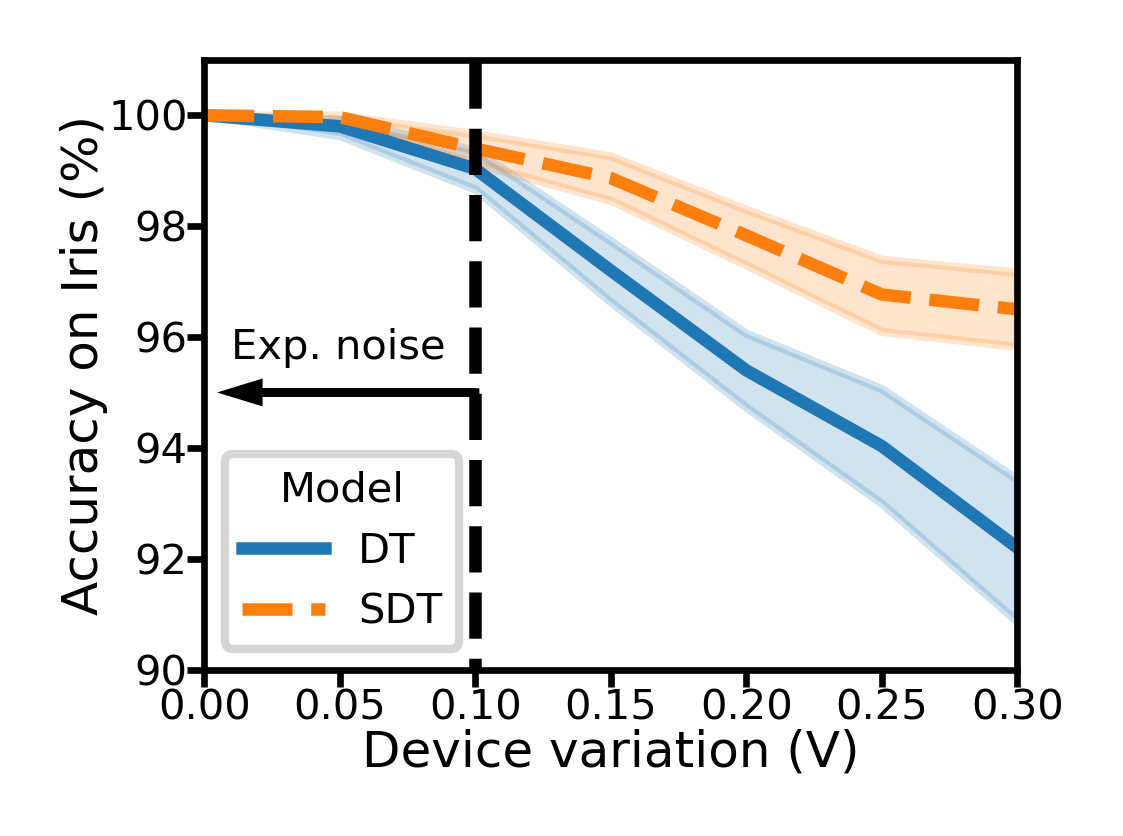

In [ ]:
noise_type = 1

plt.style.use('default')


plt.rcParams["svg.fonttype"]='none'
plt.rcParams["font.family"]='Helvetica'
plt.rcParams["savefig.transparent"]=False
fig, ax = plt.subplots(dpi=600,figsize=(1.76,1.32))
ax.set_box_aspect(1.32/1.76)

# sns.set_style('whitegrid')

if noise_type==0:
    sns.lineplot(data=acc_all[acc_all['Noise level']<=0.3],x='Noise level',y='Accuracy',hue='Model',style='Model')
    # plt.plot([0.1,0.1],[70,110],'k--')
    # plt.arrow(x=0.1,y=92,dx=-0.07,dy=0,length_includes_head=True,head_width = 0.3,head_length=0.01,fill=True,color='k')
    # plt.text(0.032,92.6,'Exp. noise',fontsize=5)
    plt.xlim(0,.3)
    plt.ylim(80,102)
    noise_save = 'gaussian noise'

if noise_type==1:
    sns.lineplot(data=acc_all[acc_all['Noise level']<=0.31],x='Noise level',y='Accuracy',hue='Model',style='Model')
    plt.plot([0.1,0.1],[70,110],'k--')
    plt.arrow(x=0.1,y=95,dx=-0.09,dy=0,length_includes_head=True,head_width = 0.3,head_length=0.01,fill=True,color='k')
    plt.text(0.01,95.6,'Exp. noise',fontsize=5)
    plt.xlim(0,.3)
    plt.ylim(90,101)
    noise_save = 'uniform noise'

plt.xlabel('Device variation (V)',fontsize=6,labelpad=0)
plt.ylabel('Accuracy on Iris (%)',fontsize=6,labelpad=0)
ax.tick_params(axis='y', which='major', length=2,pad=0,labelsize=5)
ax.tick_params(axis='x', which='major', length=2,pad=0.2,labelsize=5)
plt.legend(['DT','_','SDT'],fontsize=5,title='Model',title_fontsize=5)
# plt.savefig('./Accuracy under noise.svg',transparent=True,dpi=200)

plt.savefig('./Iris accuracy '+ noise_save + '.svg',format='svg',transparent=True)



In [21]:
load_tree.node_gain

Parameter containing:
tensor([[-10.0962,  -9.7612,  -9.7612],
        [-10.0903, -10.1047, -10.1229],
        [ -9.7688,  -9.8279, -10.1031],
        [ -9.7698, -10.0081,  -9.8609],
        [ -9.7648, -10.0622, -10.0426]])

In [22]:
load_tree.node_threshold

Parameter containing:
tensor([[-0.5159, -1.7655, -0.2067],
        [-0.4067,  0.3447,  0.3672],
        [-0.2966,  0.3277,  0.4298],
        [-0.2977,  0.4069,  0.2149],
        [-0.3486,  0.3382,  0.2837]], requires_grad=True)

In [23]:
load_tree.node_threshold[0,0]

tensor(-0.5159, grad_fn=<SelectBackward0>)

In [24]:
load_tree.node_path

array([[0, 1, 0],
       [0, 2, 3],
       [0, 2, 3],
       [0, 2, 6],
       [0, 2, 6]], dtype=int64)

In [23]:
threshold

array([-0.41666666, -2.        ,  0.375     ,  0.33898306, -2.        ,
       -2.        ,  0.30508475, -2.        , -2.        ])

In [20]:
def decision_path_crisp(x1,x2):
    y=np.zeros([len(x1),len(x2)])
    for i,xx1 in enumerate(x1):
        if xx1<=-0.4167:
            y[i,:]=1
        else:
            for j,xx2 in enumerate(x2):
                if xx1<=0.375:
                    if xx2<=0.33898306:
                        y[i,j]=2
                    else:
                        y[i,j]=3
                else:
                    y[i,j]=3

    return y



In [21]:
def modify_sigmoid(x,c,k):
    x = x.clone().detach()
    y = torch.sigmoid(k*(x-c))
    return y

def decision_path(x1,x2,row,n,c_array,k_array,decision_direction):
    y = 1
    for i in range(n):
        if i<=1:
            y = y*modify_sigmoid(x1,c_array[row,i],k_array[row,i]*decision_direction[i])
        else:
            # print(y.shape)
            y = y.reshape([1,-1])*modify_sigmoid(x2,c_array[row,i],k_array[row,i]*decision_direction[i]).reshape([-1,1])
    if n<=2:
        y = y.reshape([1,-1])*torch.ones([len(y),1])
    return y

In [69]:
load_tree.node_threshold

Parameter containing:
tensor([[-0.4753, -1.8815, -0.3045],
        [-0.4078,  0.3554,  0.3576],
        [-0.3599,  0.3595,  0.3978],
        [-0.3654,  0.4005,  0.2604],
        [-0.3850,  0.3520,  0.2924]], requires_grad=True)

In [70]:
load_tree.node_gain

Parameter containing:
tensor([[-10., -10., -10.],
        [-10., -10., -10.],
        [-10., -10., -10.],
        [-10., -10., -10.],
        [-10., -10., -10.]])

In [75]:
new_threshold = torch.tensor([
    [0.57,0.67,-1],
    [0.57,0.56,-1],
    [0.39,0.56,-1],
    [0.39,0.45,0.74],
    [0.39,0.45,0.69],
    ])

In [ ]:
x1 = torch.tensor(np.arange(-1,1,0.01))
x2 = torch.tensor(np.arange(-1,1,0.01))


y0 = decision_path(x1,x2,0,1,load_tree.node_threshold,load_tree.node_gain,[1])
y1 = decision_path(x1,x2,1,3,load_tree.node_threshold,load_tree.node_gain,[-1,1,1])
y2 = decision_path(x1,x2,2,3,load_tree.node_threshold,load_tree.node_gain,[-1,1,-1])
y3 = decision_path(x1,x2,3,3,load_tree.node_threshold,load_tree.node_gain,[-1,-1,1])
y4 = decision_path(x1,x2,4,3,load_tree.node_threshold,load_tree.node_gain,[-1,-1,-1])

In [76]:
xx1 = torch.tensor(np.arange(0,1,0.01))
xx2 = torch.tensor(np.arange(0,1,0.01))
yy0 = decision_path(xx1,xx2,0,2,new_threshold,load_tree.node_gain,[1,1])
yy1 = decision_path(xx1,xx2,1,2,new_threshold,load_tree.node_gain,[1,-1])
yy2 = decision_path(xx1,xx2,2,2,new_threshold,load_tree.node_gain,[-1,1])
yy3 = decision_path(xx1,xx2,3,3,new_threshold,load_tree.node_gain,[-1,-1,1])
yy4 = decision_path(xx1,xx2,4,3,new_threshold,load_tree.node_gain,[-1,-1,-1])

In [23]:
u1 = decision_path_crisp(x1,x2)

In [24]:
y_image = np.array([
    
    [y1.detach().numpy()],
    [(y2+y3+y4).detach().numpy()],
    [y0.detach().numpy()],
    ]
    )

In [25]:
y_image.squeeze().transpose([1,2,0]).shape

(200, 200, 3)

In [26]:
def custom_cmap():
    colors=['#1f77b4', '#ff7f0e', '#2ca02c']
    # colors=['#1f77b4', '#ff7f0e', plt.cm.brg.get_over()]
    cmap = mpl.colors.ListedColormap(colors)
    return cmap

In [27]:
X1,X2 = X[:,-1],X[:,-2]

In [28]:
y[:50]
y[50:100]
y[100:]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

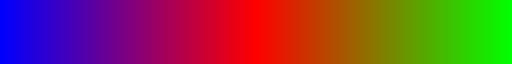

In [29]:
plt.cm.brg

E:\Users\mxxxc\AppData\Local\Temp\ipykernel_377728\672985613.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X1[:50]*100+100,X2[:50]*100+100,c=plt.cm.brg.get_under(),s=2,cmap=plt.cm.brg,marker='o')
E:\Users\mxxxc\AppData\Local\Temp\ipykernel_377728\672985613.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X1[:50]*100+100,X2[:50]*100+100,c=plt.cm.brg.get_under(),s=2,cmap=plt.cm.brg,marker='o')
E:\Users\mxxxc\AppData\Local\Temp\ipykernel_377728\672985613.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

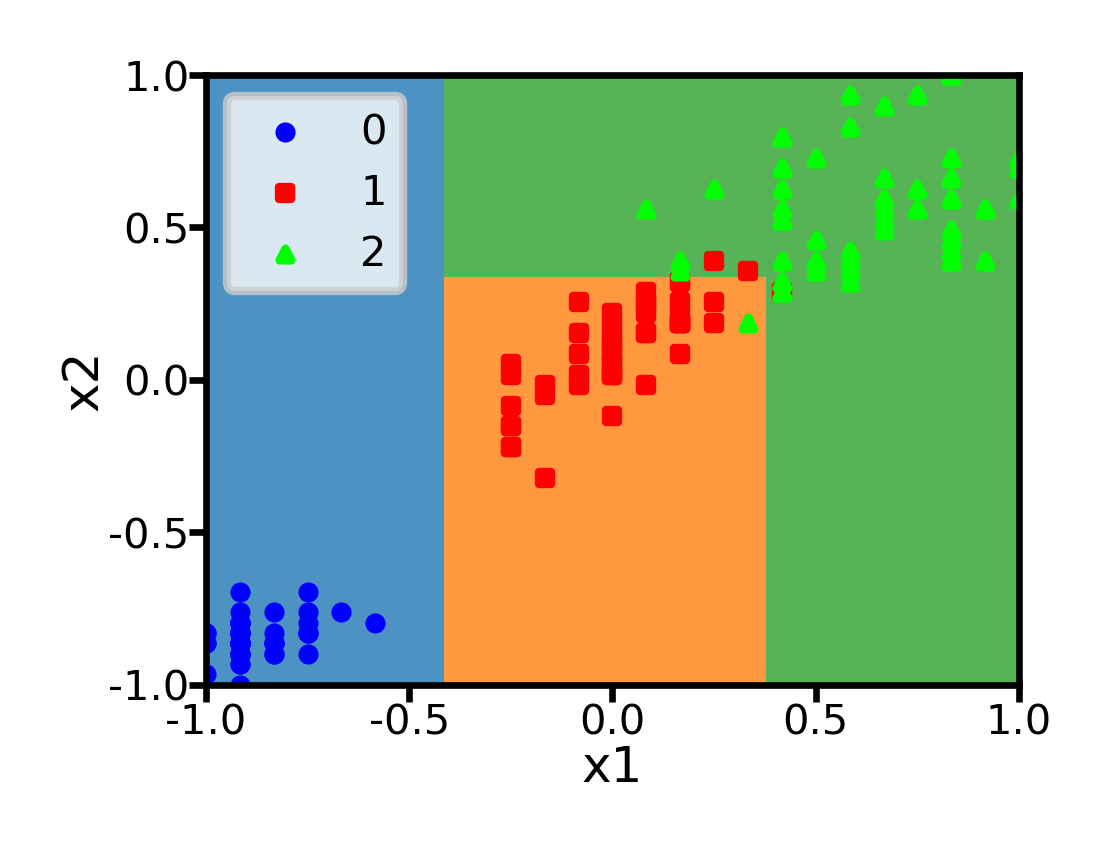

In [38]:
plt.style.use('default')
# mpl.rcParams["svg.fonttype"]='none'
# mpl.rcParams['svg.hashsalt'] = 'hello'
# plt.rcParams["font.family"]='Helvetica'
# plt.rcParams["savefig.transparent"]=True
# cm = 1/2.54
plt.rcParams["svg.fonttype"]='none'
plt.rcParams["font.family"]='Helvetica'
plt.rcParams["savefig.transparent"]=False
fig, ax = plt.subplots(dpi=600,figsize=(1.76,1.32))
ax.set_box_aspect(1.32/1.76)
# fig, ax = plt.subplots(dpi=200,figsize=(2.28,2.28),layout='tight')
# fig, ax = plt.subplots(dpi=600,figsize=(5*cm,5*cm))
# ax.set_box_aspect(1)
plt.imshow(u1.transpose(),origin = 'lower',cmap=custom_cmap(),alpha=0.8,aspect='0.75')

# plt.figure(dpi=200)

plt.xticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.yticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))

plt.xlabel('x1',fontsize=6,labelpad=0)
plt.ylabel('x2',fontsize=6,labelpad=0)
plt.xlim([0,200])
plt.ylim([0,200])
plt.scatter(X1[:50]*100+100,X2[:50]*100+100,c=plt.cm.brg.get_under(),s=2,cmap=plt.cm.brg,marker='o')
plt.scatter(X1[50:100]*100+100,X2[50:100]*100+100,c=np.array([1,0.0,0.0,1]),s=2,cmap=plt.cm.brg,marker='s')
plt.scatter(X1[100:]*100+100,X2[100:]*100+100,c=plt.cm.brg.get_over(),s=2,cmap=plt.cm.brg,marker='^')
ax.tick_params(axis='y', which='major', length=2,pad=0,labelsize=5)
ax.tick_params(axis='x', which='major', length=2,pad=0.2,labelsize=5)
# plt.title('Wrong:5')
# plt.legend(['class0','class1','class2'])

plt.legend(['0','1','2'],fontsize=5)
# plt.savefig('decision area.svg',transparent=True,format='svg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0, 0.5, 'feature2')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

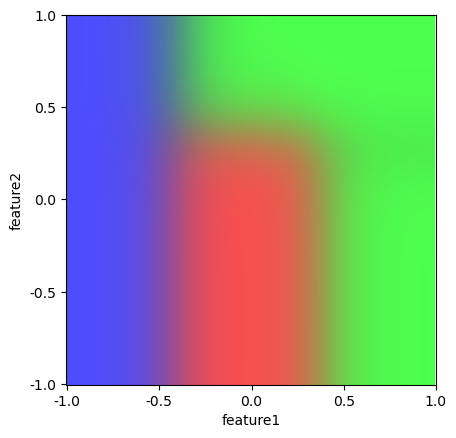

In [39]:
plt.imshow(y_image.squeeze().transpose([1,2,0]),origin = 'lower',alpha=0.7)
# plt.imshow((y1).detach().numpy(),origin = 'lower',cmap='Oranges',alpha=0.5)
# plt.imshow((y2+y3+y4).detach().numpy(),origin = 'lower',cmap='Greens',alpha=0.3)
plt.xticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.yticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.xlabel('feature1')
plt.ylabel('feature2')
# plt.hold(True)
# plt.scatter(X1*100+100,X2*100+100,c=y)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

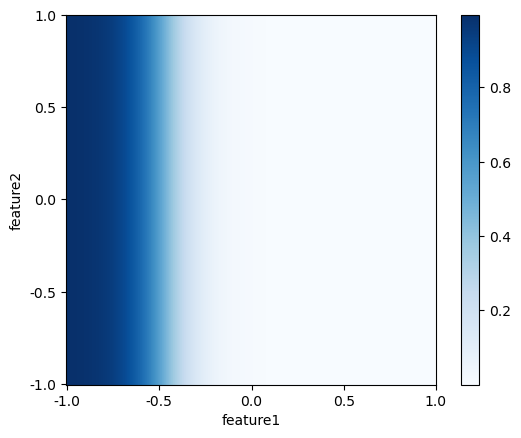

In [40]:
plt.imshow(y0.detach().numpy(),origin = 'lower',cmap='Blues',alpha=1)
# plt.imshow((y1).detach().numpy(),origin = 'lower',cmap='Oranges',alpha=1)
# plt.imshow((y2+y3+y4).detach().numpy(),origin = 'lower',cmap='Greens',alpha=1)
plt.xticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.yticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.colorbar()
# plt.hold(True)
# plt.scatter(X1*100+100,X2*100+100,c=y)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

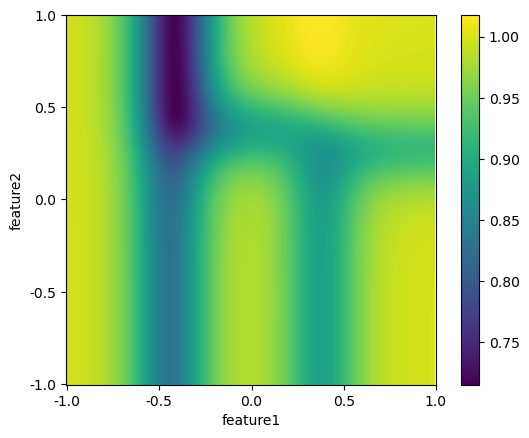

In [41]:
# plt.imshow((y0).detach().numpy())
# plt.imshow((y1).detach().numpy())
plt.imshow((y0+y1+y2+y3+y4).detach().numpy(),origin = 'lower')
plt.xticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.yticks(np.arange(0,210,50),np.arange(-1,1.1,0.5))
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.colorbar()

In [42]:
x1m,x2m = np.meshgrid(x1,x2)

In [73]:
xx1m,xx2m = np.meshgrid(xx1,xx2)

In [43]:
from mpl_toolkits.mplot3d import Axes3D

In [44]:
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

In [45]:
y0

tensor([[9.9476e-01, 9.9422e-01, 9.9361e-01,  ..., 5.2853e-07, 4.7823e-07,
         4.3272e-07],
        [9.9476e-01, 9.9422e-01, 9.9361e-01,  ..., 5.2853e-07, 4.7823e-07,
         4.3272e-07],
        [9.9476e-01, 9.9422e-01, 9.9361e-01,  ..., 5.2853e-07, 4.7823e-07,
         4.3272e-07],
        ...,
        [9.9476e-01, 9.9422e-01, 9.9361e-01,  ..., 5.2853e-07, 4.7823e-07,
         4.3272e-07],
        [9.9476e-01, 9.9422e-01, 9.9361e-01,  ..., 5.2853e-07, 4.7823e-07,
         4.3272e-07],
        [9.9476e-01, 9.9422e-01, 9.9361e-01,  ..., 5.2853e-07, 4.7823e-07,
         4.3272e-07]], dtype=torch.float64, grad_fn=<MulBackward0>)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

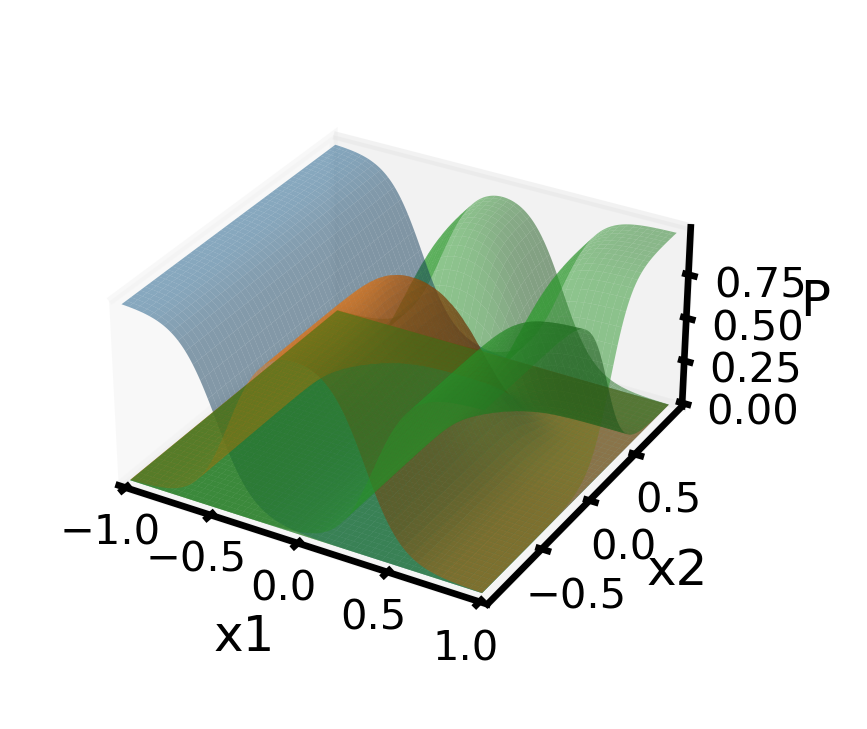

In [46]:
plt.style.use('default')
plt.rcParams["svg.fonttype"]='none'
plt.rcParams['svg.hashsalt'] = 'hello'
plt.rcParams["font.family"]='Helvetica'
plt.rcParams["savefig.transparent"]=True


# fig1 = plt.figure(dpi=600,figsize=(3,3))
cm = 1/2.54
# fig, ax = plt.subplots(dpi=200,figsize=(2.28,2.28),layout='tight')
# fig1, ax = plt.subplots(dpi=600,figsize=(5*cm,5*cm))
# fig1 = plt.figure(dpi=600,figsize=(5*cm,4.5*cm))
# fig1 = plt.figure(dpi=600,figsize=(5*cm,4.5*cm))


# fig1=plt.figure(dpi=200,facecolor='white')
# ax = Axes3D(fig1,facecolor='white')
ax = plt.figure(dpi=600,figsize=(1.76,1.32)).add_subplot(projection='3d')
# ax.set_box_aspect(1.32/1.76)
ax.set_box_aspect([1,1,0.5])

suf1 = ax.plot_surface(x1m, x2m, (y0).detach().numpy(),alpha=0.5,label='class0')
suf2 = ax.plot_surface(x1m, x2m, (y1).detach().numpy(),alpha=0.5,color='#ff7f0e',label='class1')
suf3 = ax.plot_surface(x1m, x2m, (y2).detach().numpy(),alpha=0.5,color='#2ca02c',label='class2')
suf4 = ax.plot_surface(x1m, x2m, (y3).detach().numpy(),alpha=0.5,color='#2ca02c')
suf5 = ax.plot_surface(x1m, x2m, (y4).detach().numpy(),alpha=0.5,color='#2ca02c')
plt.xlabel('x1',fontsize=6,labelpad=-12)
plt.ylabel('x2',fontsize=6,labelpad=-12)
ax.set_zlabel('P',fontsize=6,labelpad=-12)
# ax.set_zlim([0.3,1])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_yticks([-0.5,0,0.5])
ax.tick_params(axis='y', which='major', length=3,pad=-4.5,labelsize=5,direction='out')
ax.tick_params(axis='x', which='major', length=3,pad=-5.5,labelsize=5,direction='out')
ax.tick_params(axis='z', which='major', length=3,pad=-3,labelsize=5,direction='out')
suf1._facecolors2d=suf1._facecolors
suf1._edgecolors2d=suf1._edgecolors
suf2._facecolors2d=suf2._facecolors
suf2._edgecolors2d=suf2._edgecolors
suf3._facecolors2d=suf3._facecolors
suf3._edgecolors2d=suf3._edgecolors
suf4._facecolors2d=suf3._facecolors
suf4._edgecolors2d=suf3._edgecolors
suf5._facecolors2d=suf3._facecolors
suf5._edgecolors2d=suf3._edgecolors
# ax.legend((suf1,suf2,suf3),['class0','class1','class2'])
# ax.legend(['0','1','2'],facecolor='white',fontsize=5,title='Class',title_fontsize=5)
# plt.show()
ax.grid(False)
# plt.savefig('decision surface.svg',transparent=True,format='svg')


E:\Users\mxxxc\AppData\Local\Temp\ipykernel_377728\1322361605.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X1[:50],X2[:50],c=plt.cm.brg.get_under(),s=2,cmap=plt.cm.brg,marker='o')
E:\Users\mxxxc\AppData\Local\Temp\ipykernel_377728\1322361605.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X1[:50],X2[:50],c=plt.cm.brg.get_under(),s=2,cmap=plt.cm.brg,marker='o')
E:\Users\mxxxc\AppData\Local\Temp\ipykernel_377728\1322361605.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *c

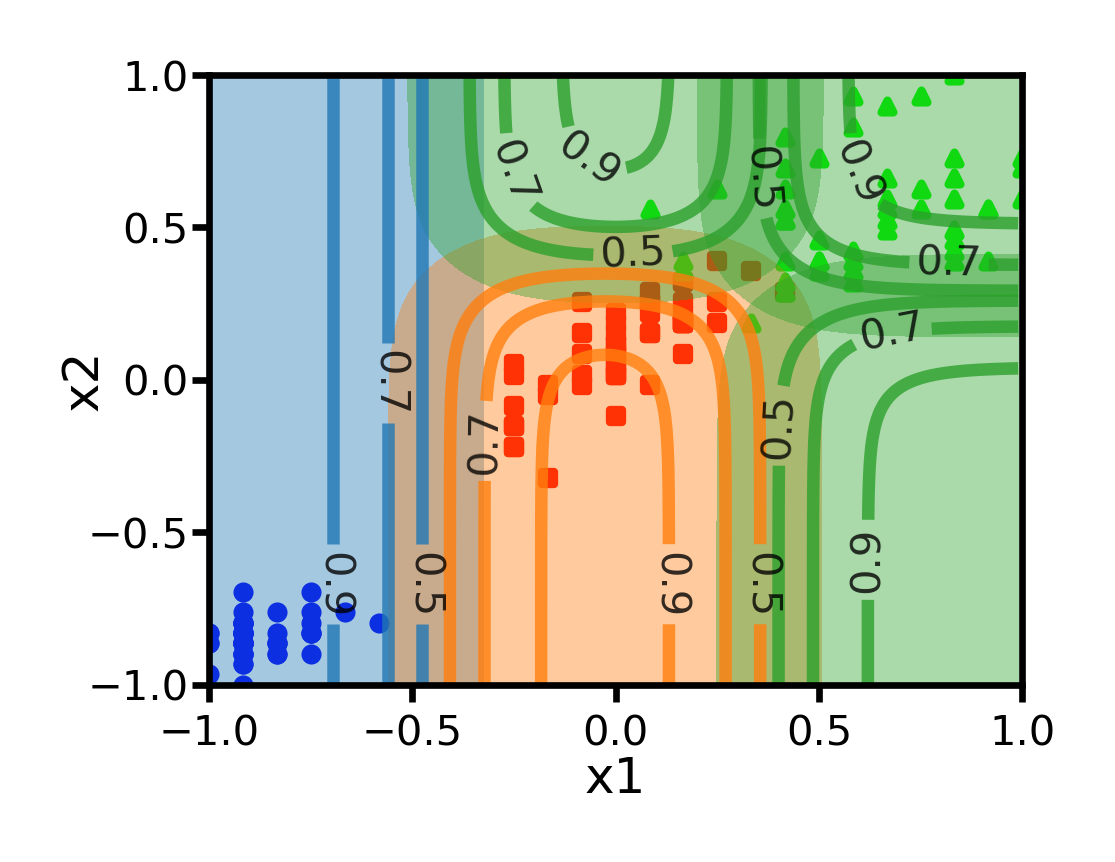

In [47]:
# plt.figure(dpi=200)
# cm = 1/2.54
# plt.style.use('default')
# plt.rcParams["svg.fonttype"]='none'
# plt.rcParams['svg.hashsalt'] = 'hello'
# plt.rcParams["font.family"]='Helvetica'
# plt.rcParams["savefig.transparent"]=True

# fig, ax = plt.subplots(dpi=600,figsize=(5*cm,5*cm))
# ax.set_box_aspect(1)
plt.rcParams["svg.fonttype"]='none'
plt.rcParams["font.family"]='Helvetica'
plt.rcParams["savefig.transparent"]=False
fig, ax = plt.subplots(dpi=600,figsize=(1.76,1.32))
ax.set_box_aspect(1.32/1.76)
X1,X2 = X[:,-1],X[:,-2]
# X1,X2 = X_test[:,-1],X_test[:,-2]

Z=(y0+y1+y2+y3+y4).detach().numpy()

Z = (Z-Z.min())/(Z.max()-Z.min())
# contour = plt.contour(x1m,x2m,Z,10)
# plt.scatter(X1,X2,c=y,s=2,cmap=plt.cm.brg)
plt.scatter(X1[:50],X2[:50],c=plt.cm.brg.get_under(),s=2,cmap=plt.cm.brg,marker='o')
plt.scatter(X1[50:100],X2[50:100],c=np.array([1,0.0,0.0,1]),s=2,cmap=plt.cm.brg,marker='s')
plt.scatter(X1[100:],X2[100:],c=plt.cm.brg.get_over(),s=2,cmap=plt.cm.brg,marker='^')
colors=['#1f77b4', '#ff7f0e', '#2ca02c']

clabell = [0.5,0.7,0.9]
contour0 = plt.contour(x1m,x2m,y0.detach().numpy(),clabell,colors=colors[0],alpha=.8)
contour1 = plt.contour(x1m,x2m,y1.detach().numpy(),clabell,colors=colors[1],alpha=.8)
contour2 = plt.contour(x1m,x2m,y2.detach().numpy(),clabell,colors=colors[2],alpha=.8)
contour3 = plt.contour(x1m,x2m,y3.detach().numpy(),clabell,colors=colors[2],alpha=.8)
contour4 = plt.contour(x1m,x2m,y4.detach().numpy(),clabell,colors=colors[2],alpha=.8)

plt.clabel(contour0,colors='k',fontsize=5)
plt.clabel(contour1,colors='k',fontsize=5)
plt.clabel(contour2,colors='k',fontsize=5)
plt.clabel(contour3,colors='k',fontsize=5)
plt.clabel(contour4,colors='k',fontsize=5)


clabel = [0.18,1]
contour0 = plt.contourf(x1m,x2m,y0.detach().numpy(),clabel,colors=colors[0],alpha=.4)
contour1 = plt.contourf(x1m,x2m,y1.detach().numpy(),clabel,colors=colors[1],alpha=.4)
contour2 = plt.contourf(x1m,x2m,y2.detach().numpy(),clabel,colors=colors[2],alpha=.4)
contour3 = plt.contourf(x1m,x2m,y3.detach().numpy(),clabel,colors=colors[2],alpha=.4)
contour4 = plt.contourf(x1m,x2m,y4.detach().numpy(),clabel,colors=colors[2],alpha=.4)




plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('x1',fontsize=6,labelpad=0)
plt.ylabel('x2',fontsize=6,labelpad=-2.5)
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.tick_params(axis='y', which='major', length=2,pad=0.5,labelsize=5,direction='out')
ax.tick_params(axis='x', which='major', length=2,pad=1.5,labelsize=5,direction='out')
# plt.savefig('decision contour.svg',transparent=True,format='svg')

plt.show()

In [48]:
X1.shape

(150,)

findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

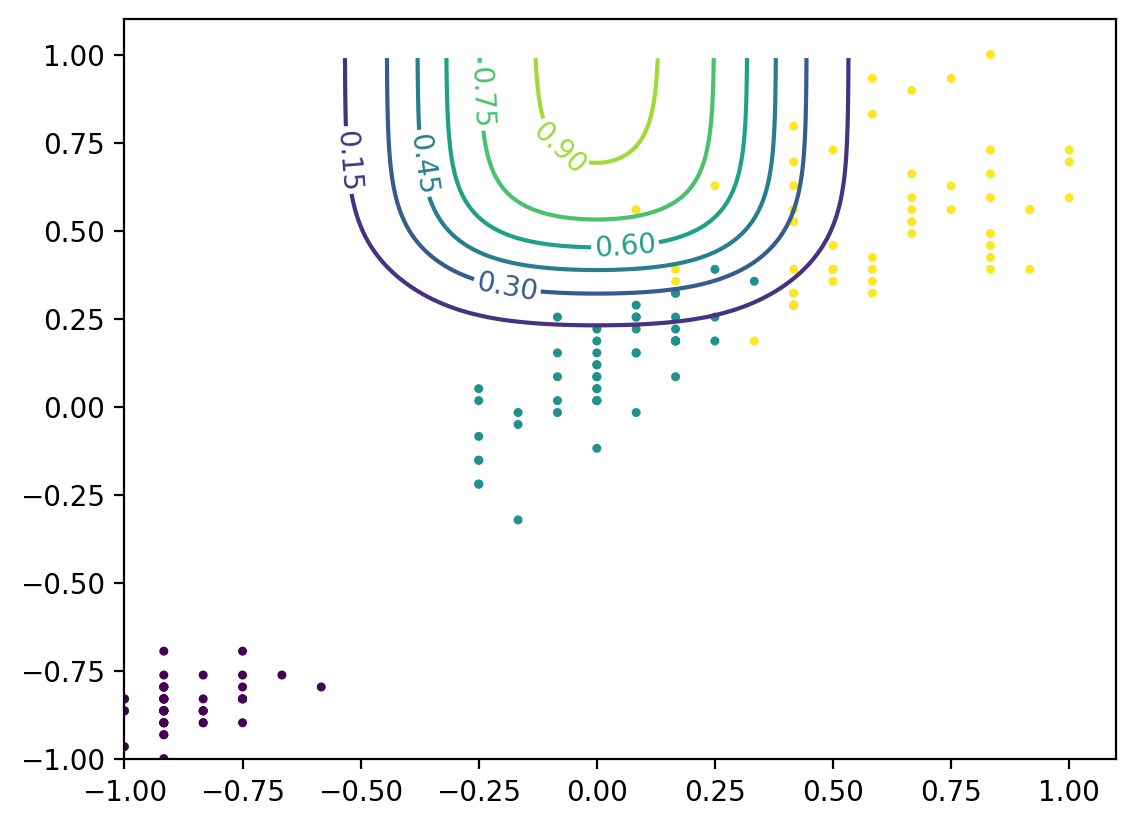

In [49]:
plt.figure(dpi=200)
X1,X2 = X[:,-1],X[:,-2]
Z=(y0+y1+y2+y3+y4).detach().numpy()

Z = (Z-Z.min())/(Z.max()-Z.min())
# contour = plt.contour(x1m,x2m,Z,10)
contour = plt.contour(x1m,x2m,y2.detach().numpy())
plt.clabel(contour)
plt.scatter(X1,X2,c=y,s=5)

findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

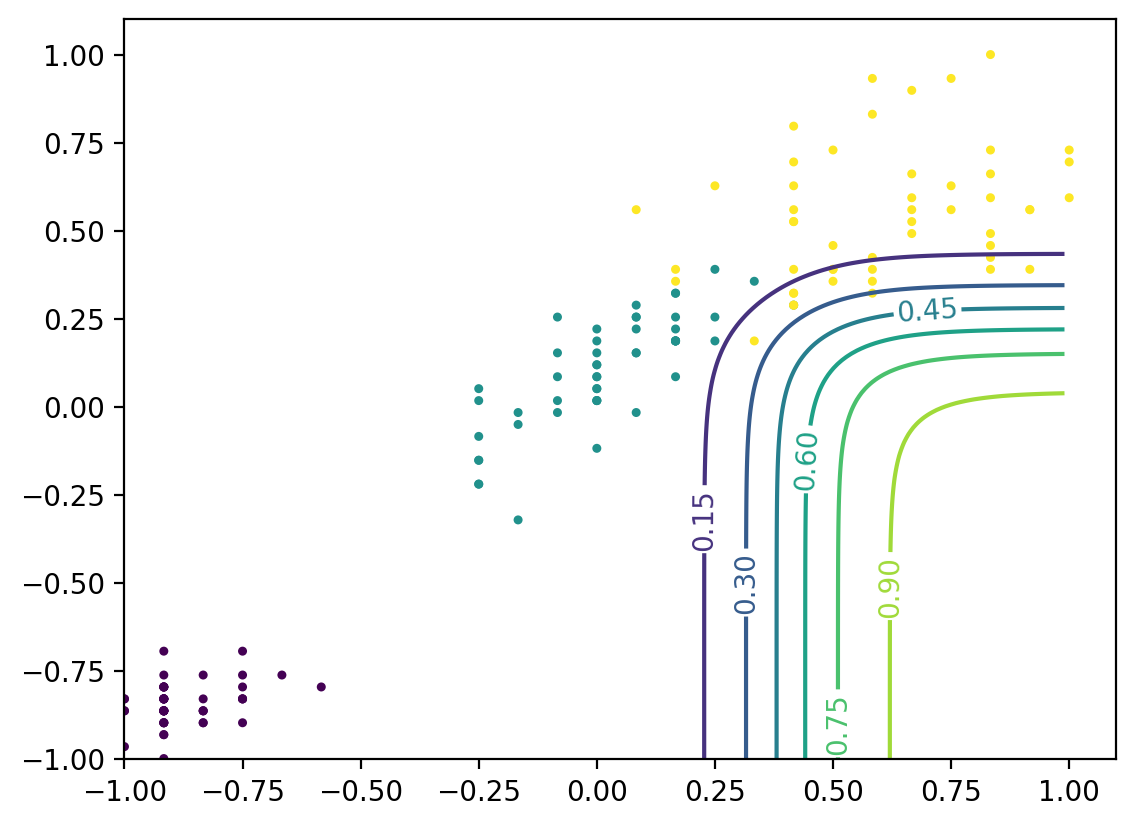

In [50]:
plt.figure(dpi=200)
X1,X2 = X[:,-1],X[:,-2]
Z=(y0+y1+y2+y3+y4).detach().numpy()

Z = (Z-Z.min())/(Z.max()-Z.min())
# contour = plt.contour(x1m,x2m,Z,10)
contour = plt.contour(x1m,x2m,y3.detach().numpy())
plt.clabel(contour)
plt.scatter(X1,X2,c=y,s=5)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

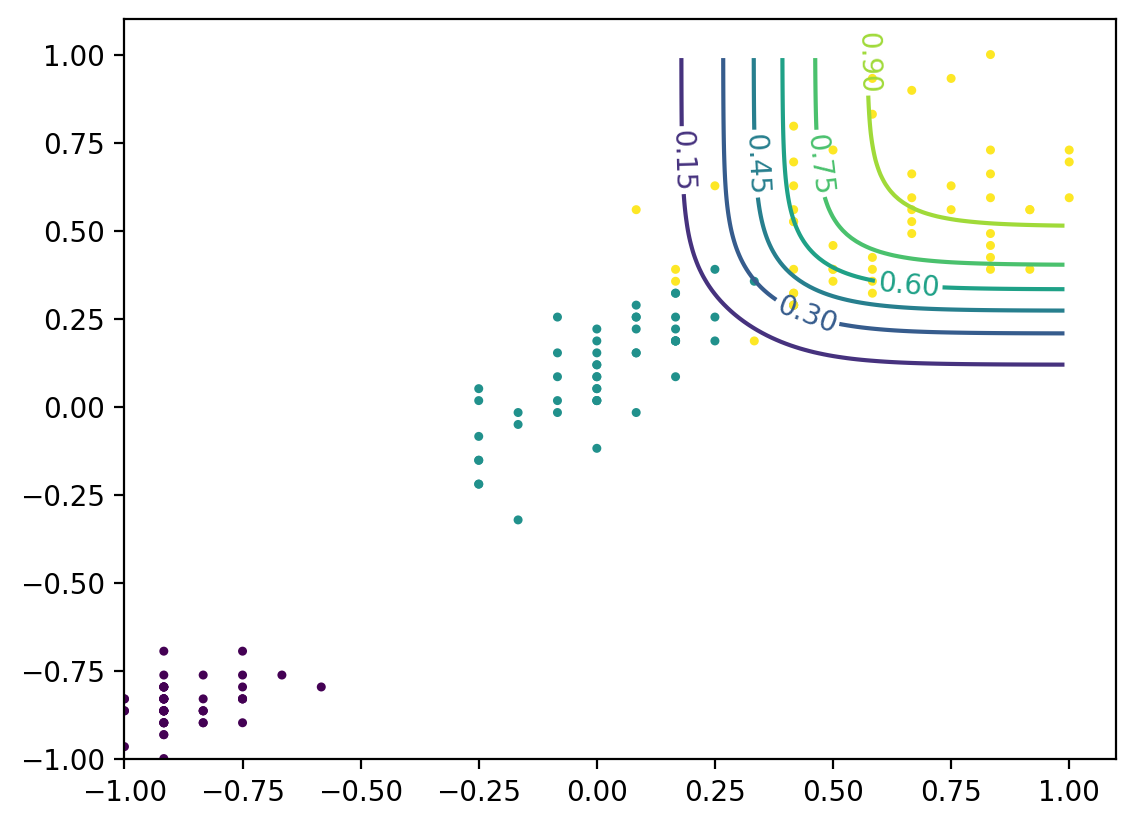

In [51]:
plt.figure(dpi=200)
X1,X2 = X[:,-1],X[:,-2]
Z=(y0+y1+y2+y3+y4).detach().numpy()

Z = (Z-Z.min())/(Z.max()-Z.min())
# contour = plt.contour(x1m,x2m,Z,10)
contour = plt.contour(x1m,x2m,y4.detach().numpy())
plt.clabel(contour)
plt.scatter(X1,X2,c=y,s=5)

In [52]:
Z.max()

1.0

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

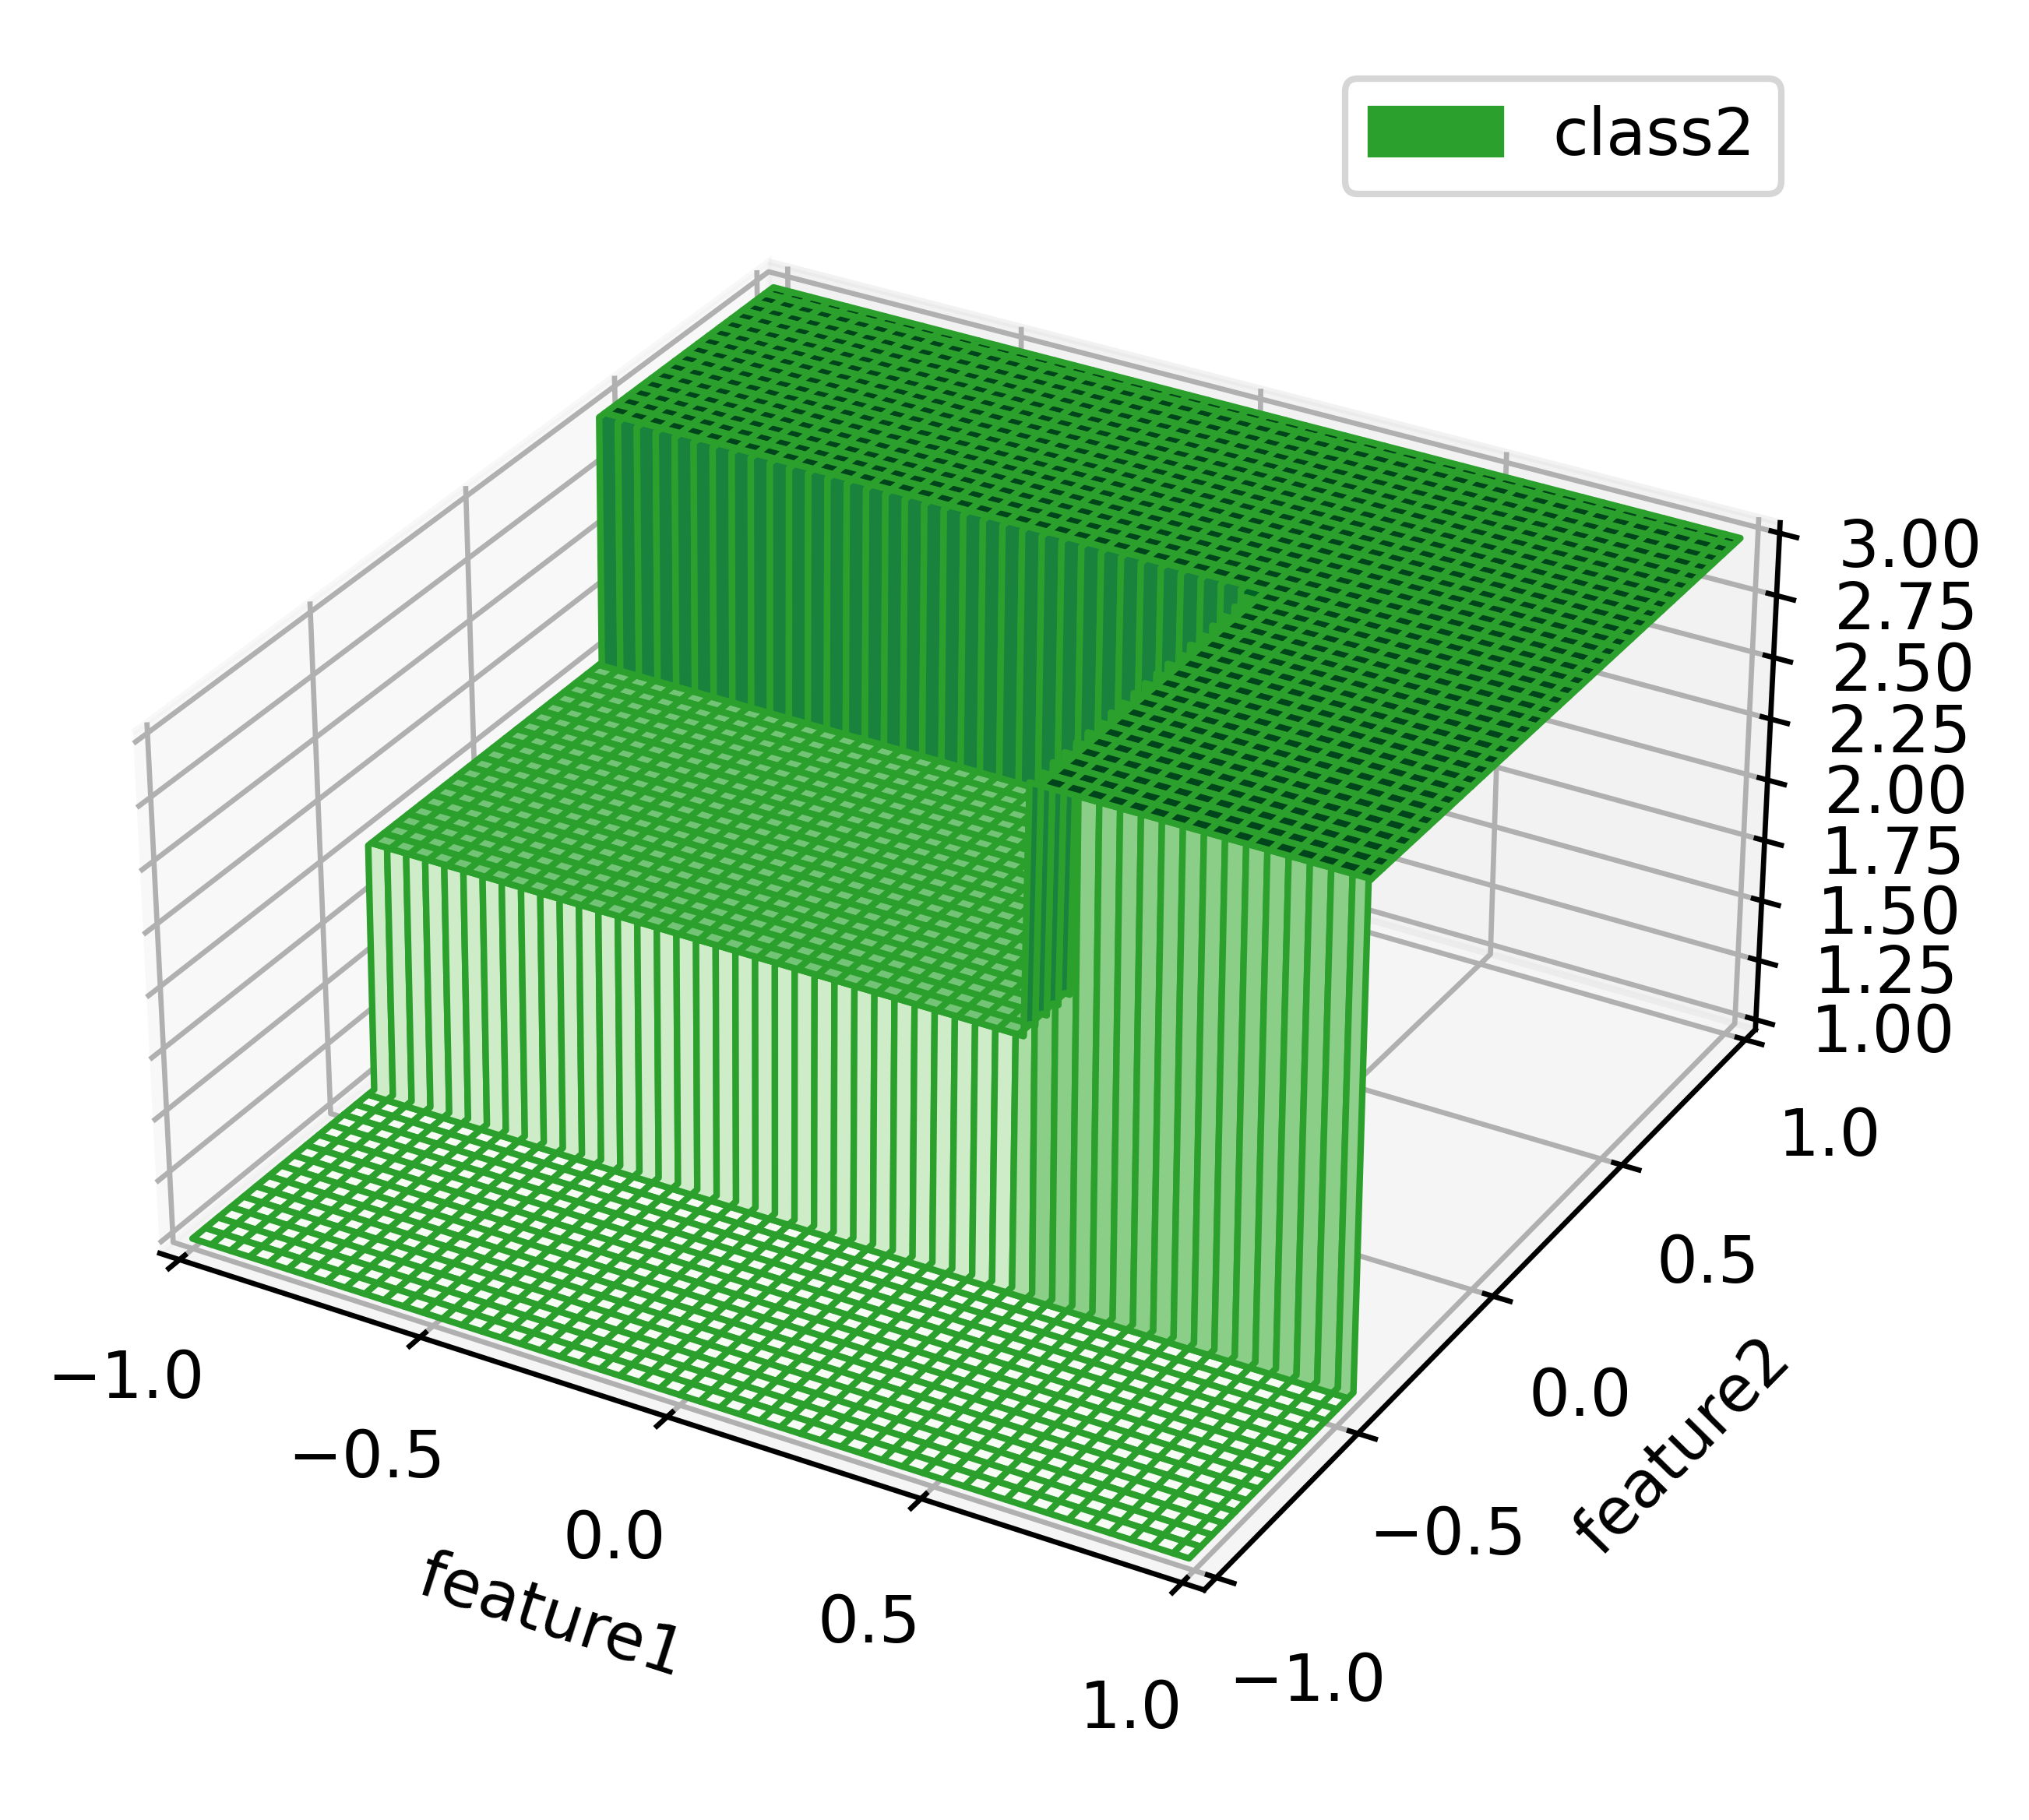

In [66]:
# fig1=plt.figure(dpi=200,facecolor='white')
# ax=Axes3D(fig1,facecolor='white')
ax = plt.figure(dpi=600).add_subplot(projection='3d')
# ax.set_box_aspect(1.32/1.76)
ax.set_box_aspect([1,1,0.5])

# suf1 = ax.plot_surface(x1m, x2m, (y0).detach().numpy(),alpha=0.5,label='class0')
# suf1 = ax.plot_surface(x1m, x2m, (y0).detach().numpy(),alpha=0.5,label='class0')
# suf2 = ax.plot_surface(x1m, x2m, (y1).detach().numpy(),alpha=0.5,color='#ff7f0e',label='class1')
# suf3 = ax.plot_surface(x1m, x2m, (y2+y3+y4).detach().numpy(),alpha=0.5,color='#2ca02c',label='class2')
suf3 = ax.plot_surface(x1m, x2m, u1,color='#2ca02c',cmap='Greens',label='class2')
plt.xlabel('feature1')
plt.ylabel('feature2')
ax.set_zlabel('P')
# ax.set_zlim([0.3,1])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_yticks([-1,-0.5,0,0.5,1])
suf1._facecolors2d=suf1._facecolors
suf1._edgecolors2d=suf1._edgecolors
suf2._facecolors2d=suf2._facecolors
suf2._edgecolors2d=suf2._edgecolors
suf3._facecolors2d=suf3._facecolors
suf3._edgecolors2d=suf3._edgecolors
# ax.legend((suf1,suf2,suf3),['class0','class1','class2'])
ax.legend(facecolor='white')
plt.show()
# plt.savefig('decision surface.svg',transparent=True)


In [55]:
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

In [56]:
suf1._facecolors2d

array([[0.09144072, 0.35101437, 0.53094611, 0.5       ],
       [0.09057563, 0.34769355, 0.52592302, 0.5       ],
       [0.08929471, 0.34277647, 0.51848542, 0.5       ],
       ...,
       [0.09320228, 0.35777648, 0.5411745 , 0.5       ],
       [0.09320238, 0.35777689, 0.54117513, 0.5       ],
       [0.09320245, 0.35777716, 0.54117553, 0.5       ]])

In [62]:
y0

tensor([[9.9476e-01, 9.9422e-01, 9.9361e-01,  ..., 5.2853e-07, 4.7823e-07,
         4.3272e-07],
        [9.9476e-01, 9.9422e-01, 9.9361e-01,  ..., 5.2853e-07, 4.7823e-07,
         4.3272e-07],
        [9.9476e-01, 9.9422e-01, 9.9361e-01,  ..., 5.2853e-07, 4.7823e-07,
         4.3272e-07],
        ...,
        [9.9476e-01, 9.9422e-01, 9.9361e-01,  ..., 5.2853e-07, 4.7823e-07,
         4.3272e-07],
        [9.9476e-01, 9.9422e-01, 9.9361e-01,  ..., 5.2853e-07, 4.7823e-07,
         4.3272e-07],
        [9.9476e-01, 9.9422e-01, 9.9361e-01,  ..., 5.2853e-07, 4.7823e-07,
         4.3272e-07]], dtype=torch.float64, grad_fn=<MulBackward0>)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

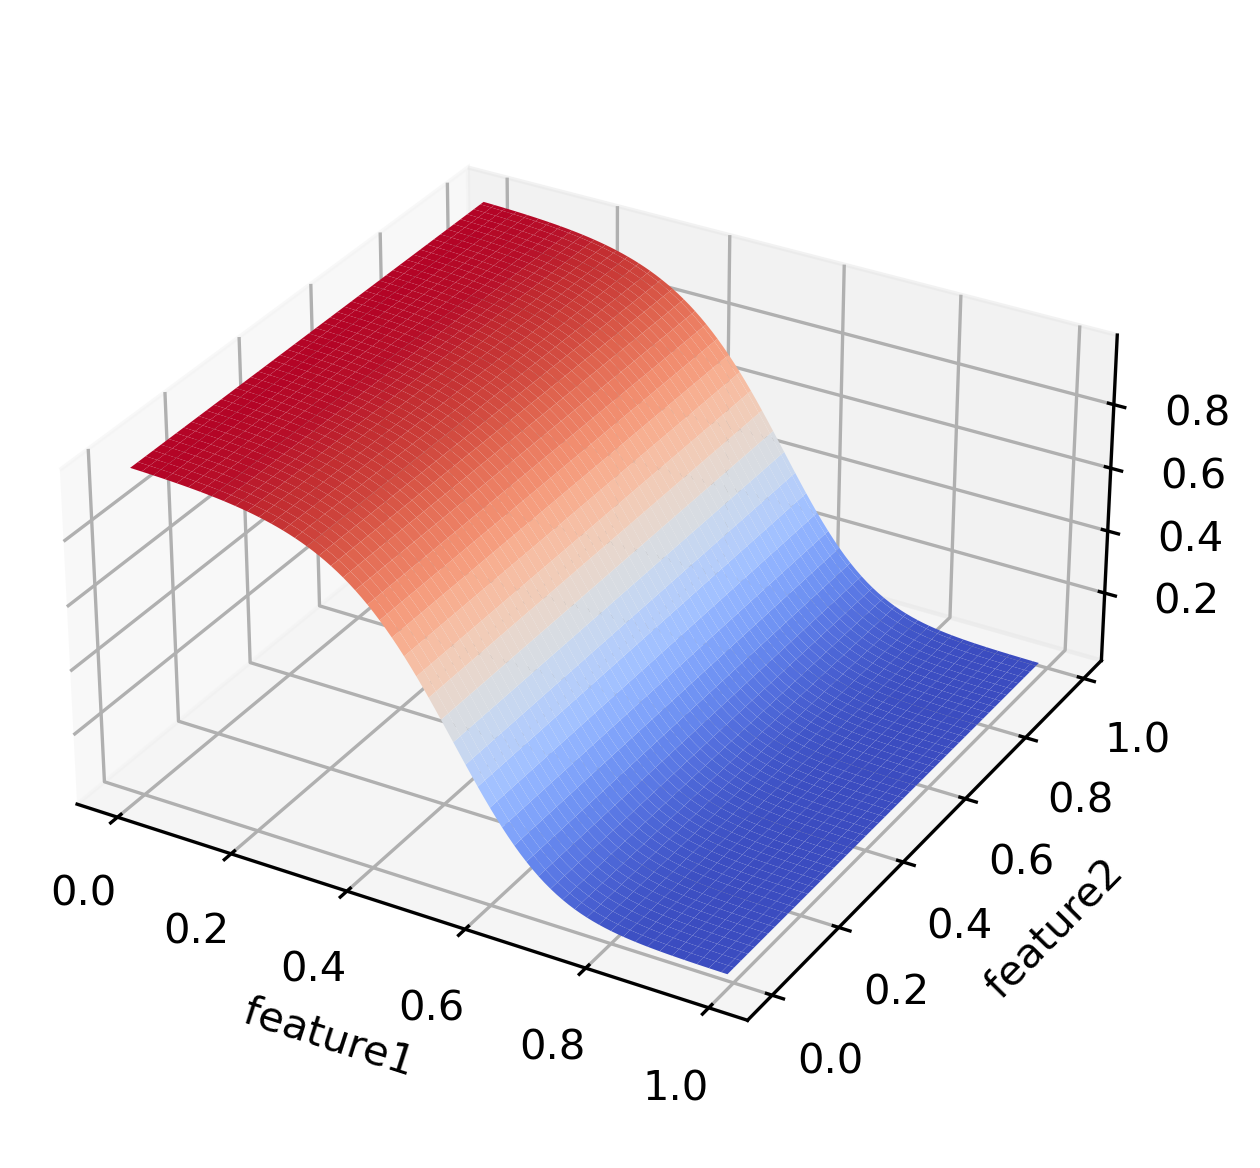

In [77]:
# fig1=plt.figure(dpi=200)
# ax=Axes3D(fig1)
ax = plt.figure(dpi=300).add_subplot(projection='3d')
# ax.set_box_aspect(1.32/1.76)
ax.set_box_aspect([1,1,0.5])

ax.plot_surface(xx1m, xx2m, (yy0).detach().numpy(),cmap=plt.cm.coolwarm)
plt.xlabel('feature1')
plt.ylabel('feature2')
ax.set_zlabel('P')
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

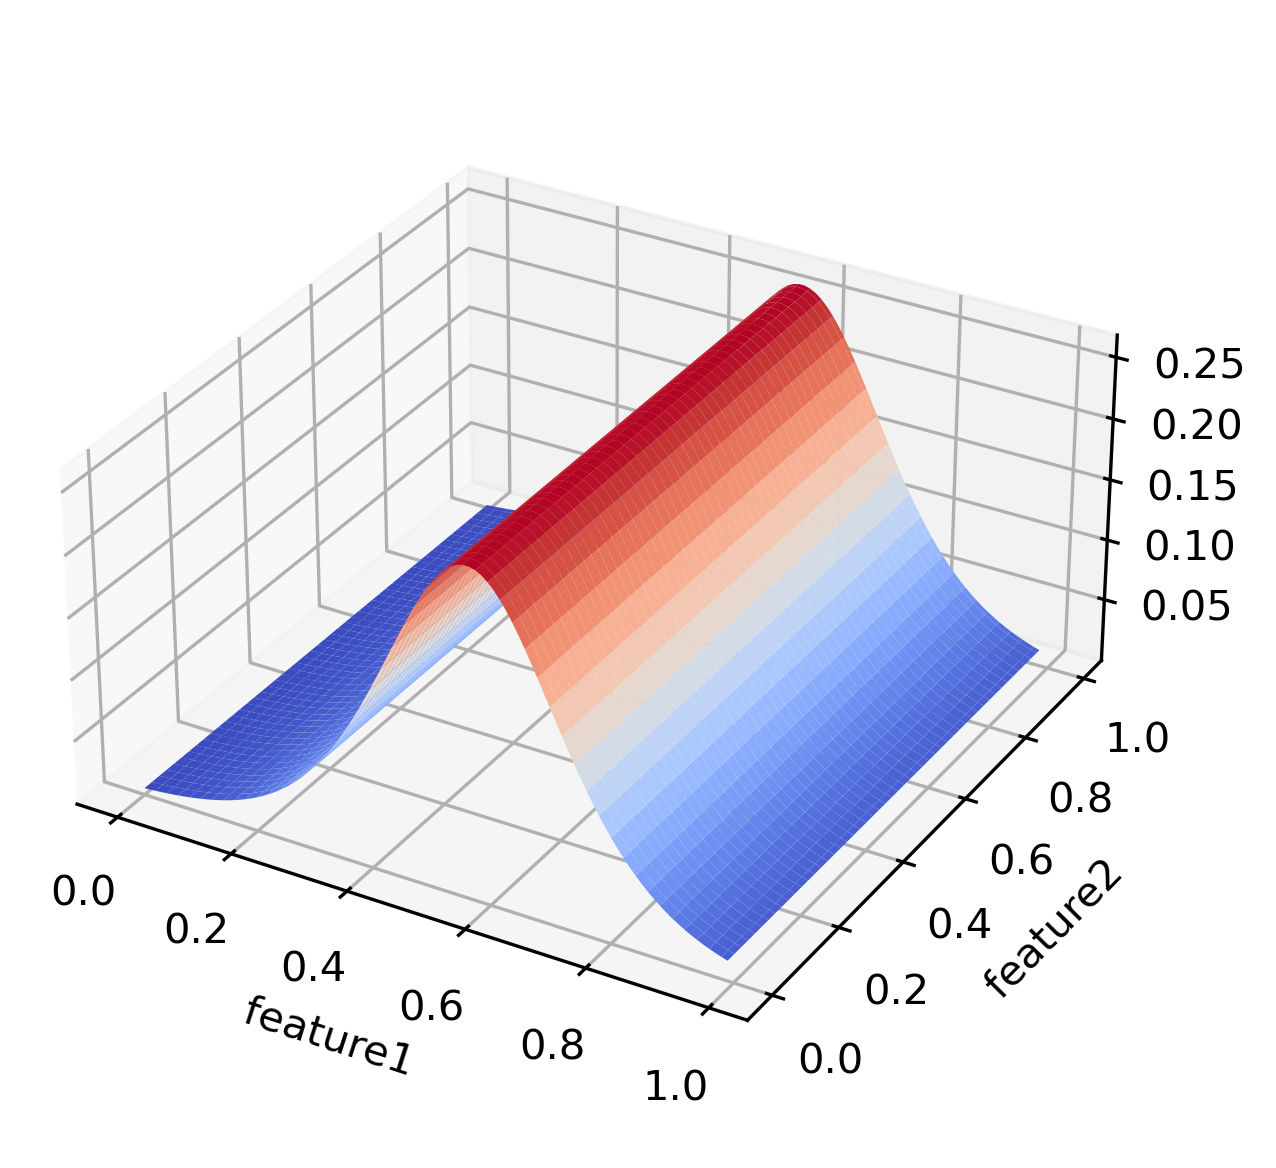

In [78]:
# fig1=plt.figure(dpi=200)
# ax=Axes3D(fig1)
ax = plt.figure(dpi=300).add_subplot(projection='3d')
# ax.set_box_aspect(1.32/1.76)
ax.set_box_aspect([1,1,0.5])

ax.plot_surface(xx1m, xx2m, (yy1).detach().numpy(),cmap=plt.cm.coolwarm)
plt.xlabel('feature1')
plt.ylabel('feature2')
ax.set_zlabel('P')
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

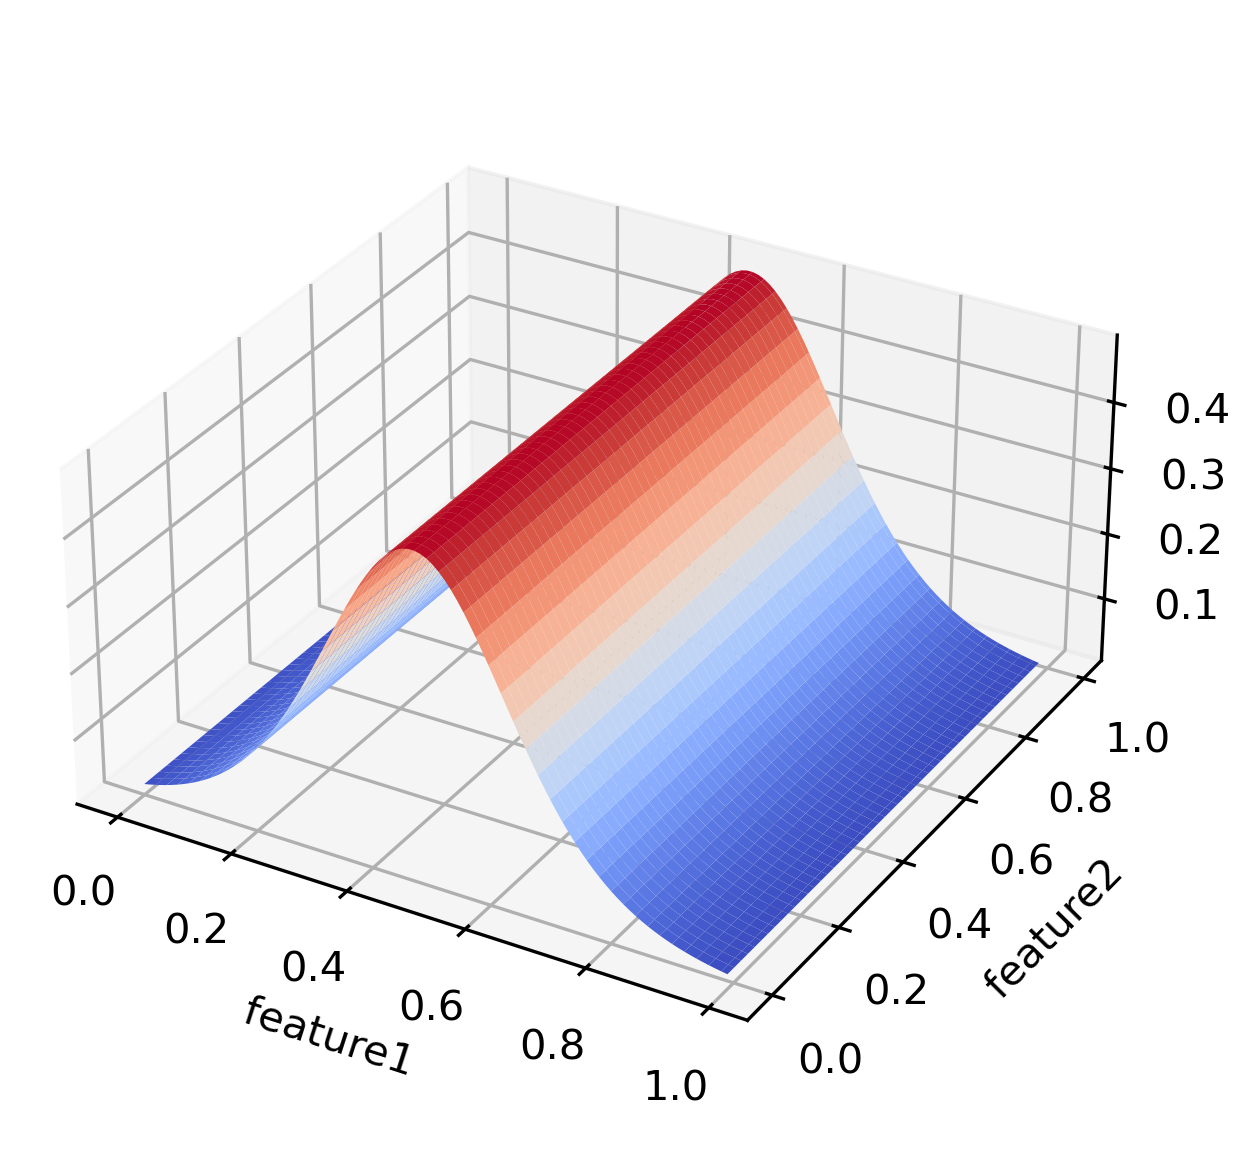

In [79]:
# fig1=plt.figure(dpi=200)
# ax=Axes3D(fig1)
ax = plt.figure(dpi=300).add_subplot(projection='3d')
# ax.set_box_aspect(1.32/1.76)
ax.set_box_aspect([1,1,0.5])

ax.plot_surface(xx1m, xx2m, (yy2).detach().numpy(),cmap=plt.cm.coolwarm)
plt.xlabel('feature1')
plt.ylabel('feature2')
ax.set_zlabel('P')
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

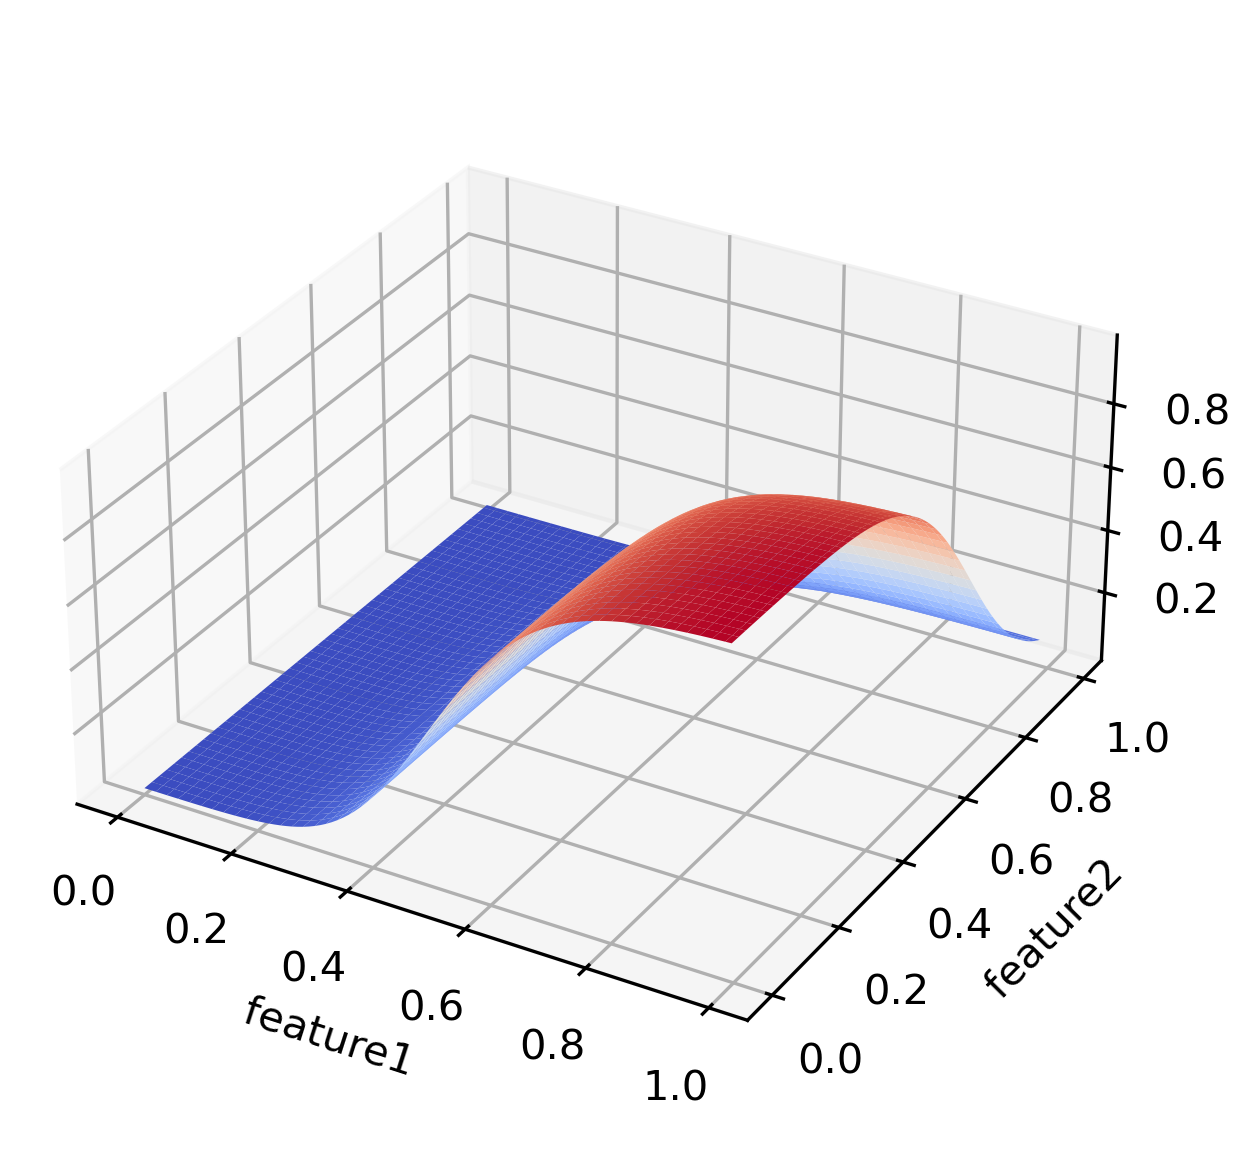

In [80]:
# fig1=plt.figure(dpi=200)
# ax=Axes3D(fig1)
ax = plt.figure(dpi=300).add_subplot(projection='3d')
# ax.set_box_aspect(1.32/1.76)
ax.set_box_aspect([1,1,0.5])

ax.plot_surface(xx1m, xx2m, (yy3).detach().numpy(),cmap=plt.cm.coolwarm)
plt.xlabel('feature1')
plt.ylabel('feature2')
ax.set_zlabel('P')
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not 

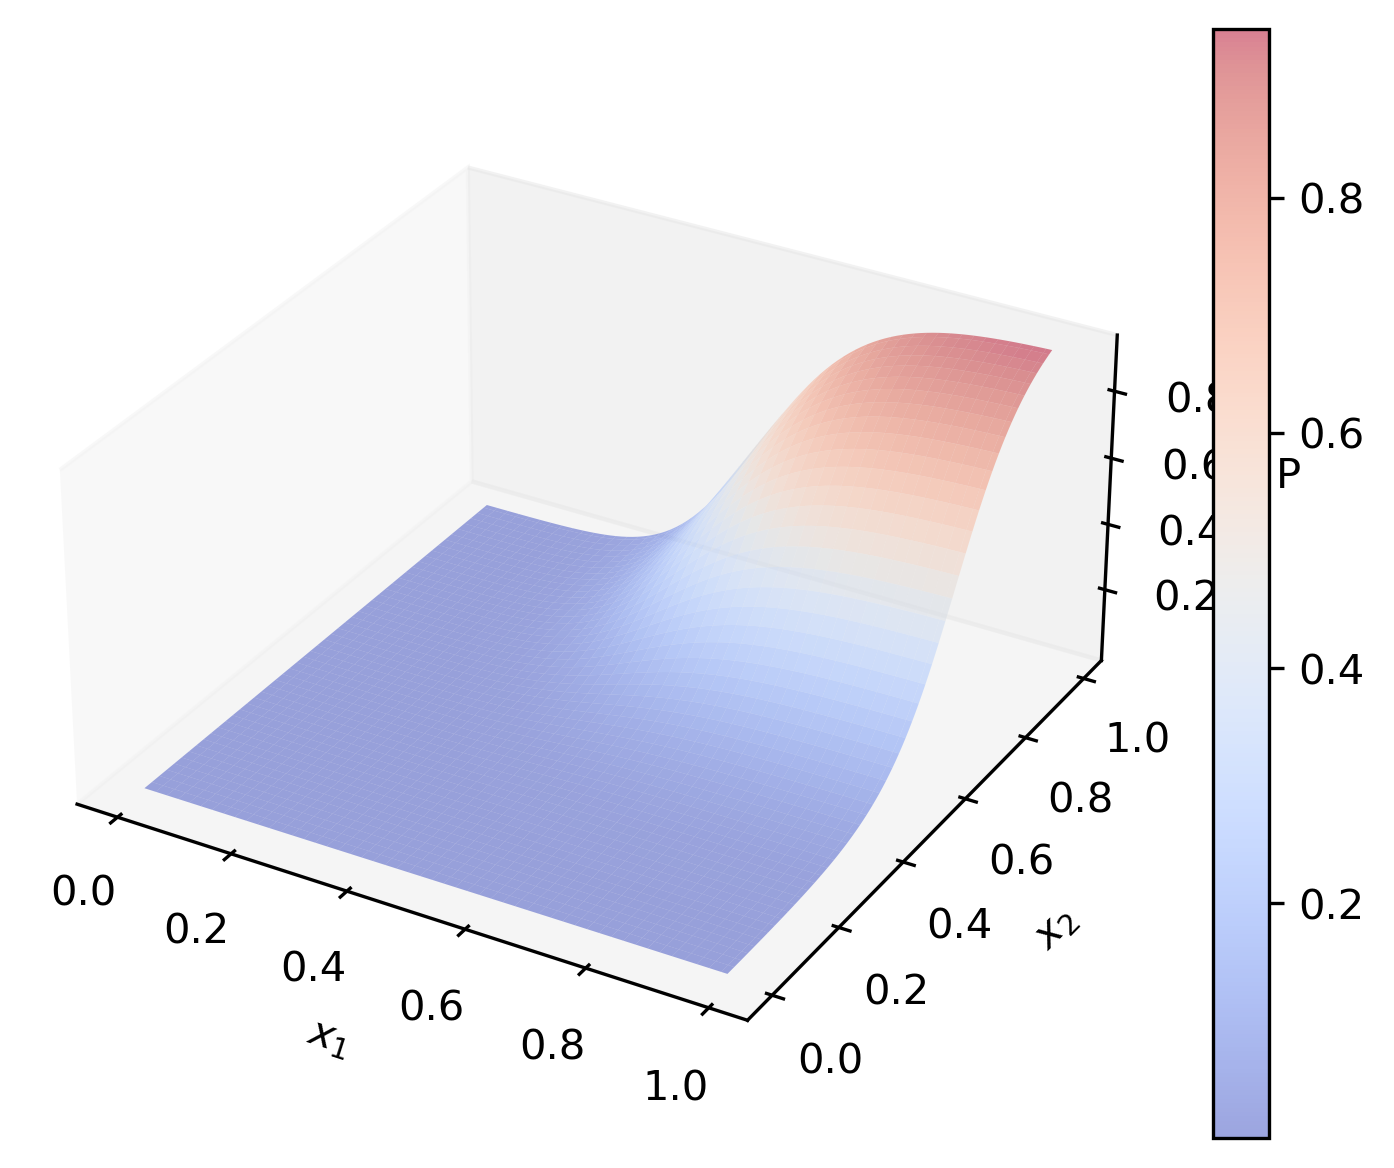

In [105]:
# fig1=plt.figure(dpi=200)
# ax=Axes3D(fig1)
ax = plt.figure(dpi=300)
ax1 = ax.add_subplot(projection='3d')
# ax.set_box_aspect(1.32/1.76)
ax1.set_box_aspect([1,1,0.5])

surff1 = ax1.plot_surface(xx1m, xx2m, (yy4).detach().numpy(),alpha=0.5,cmap=plt.cm.coolwarm)
# surff1 = ax1.plot_surface(xx1m, xx2m, (yy4).detach().numpy(),alpha=0.5,color='#2ca02c')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax1.set_zlabel('P')

surff1._facecolors2d=surff1._facecolors
surff1._edgecolors2d=surff1._edgecolors
ax1.grid(False)
plt.colorbar(surff1,ax=ax1)
plt.savefig('decision multiplication.svg',transparent=True,format='svg')
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

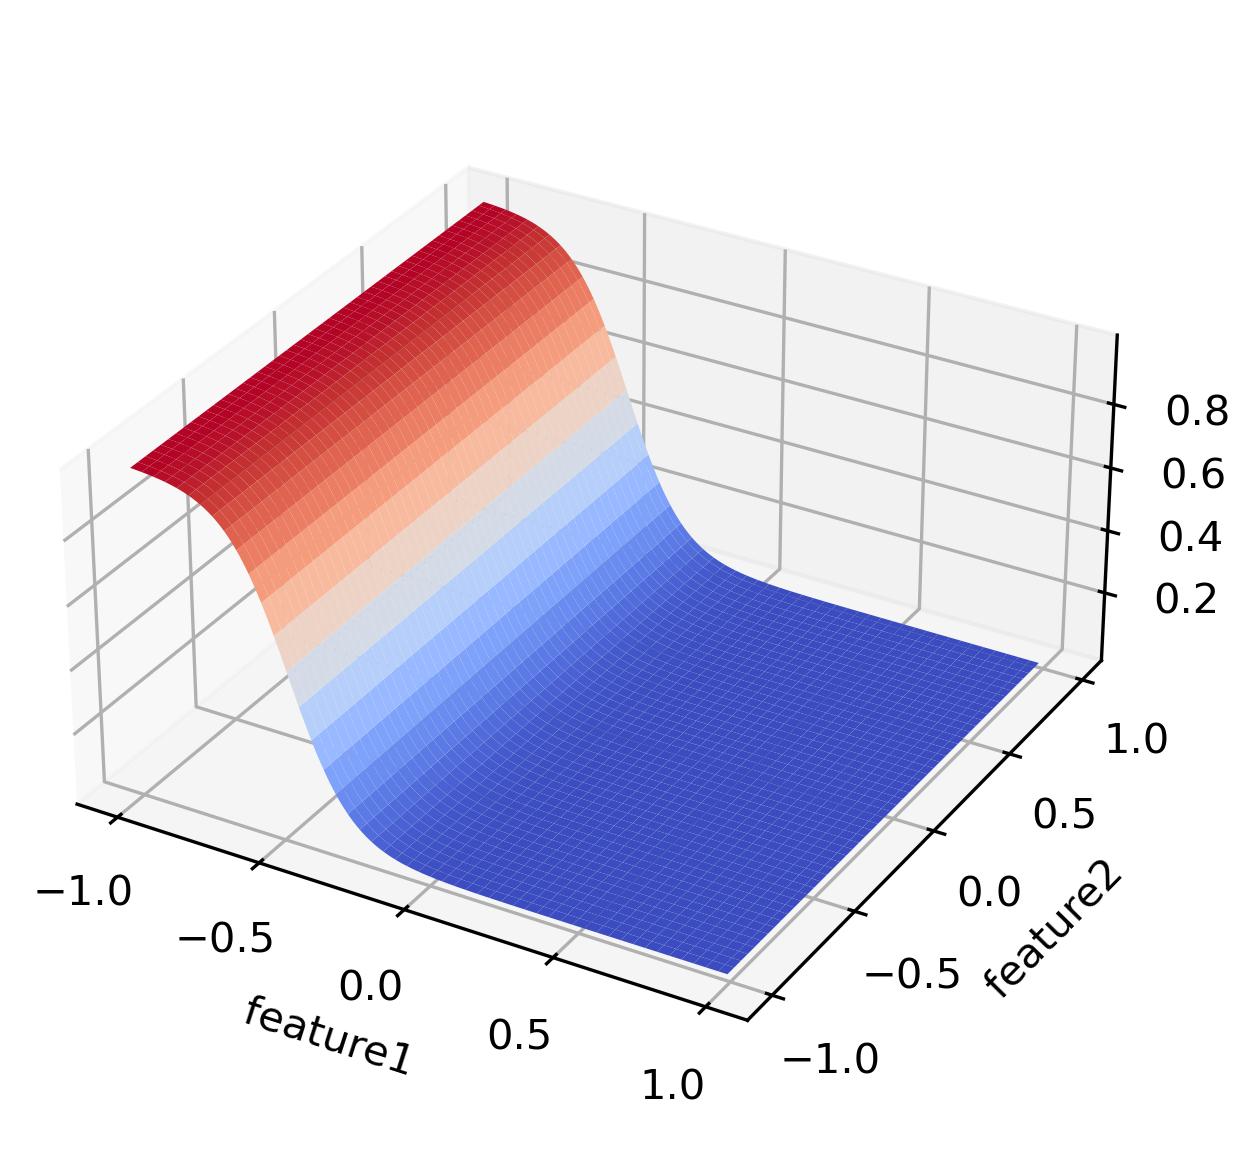

In [67]:
# fig1=plt.figure(dpi=200)
# ax=Axes3D(fig1)
ax = plt.figure(dpi=300).add_subplot(projection='3d')
# ax.set_box_aspect(1.32/1.76)
ax.set_box_aspect([1,1,0.5])

ax.plot_surface(x1m, x2m, (y0).detach().numpy(),cmap=plt.cm.coolwarm)
plt.xlabel('feature1')
plt.ylabel('feature2')
ax.set_zlabel('P')
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

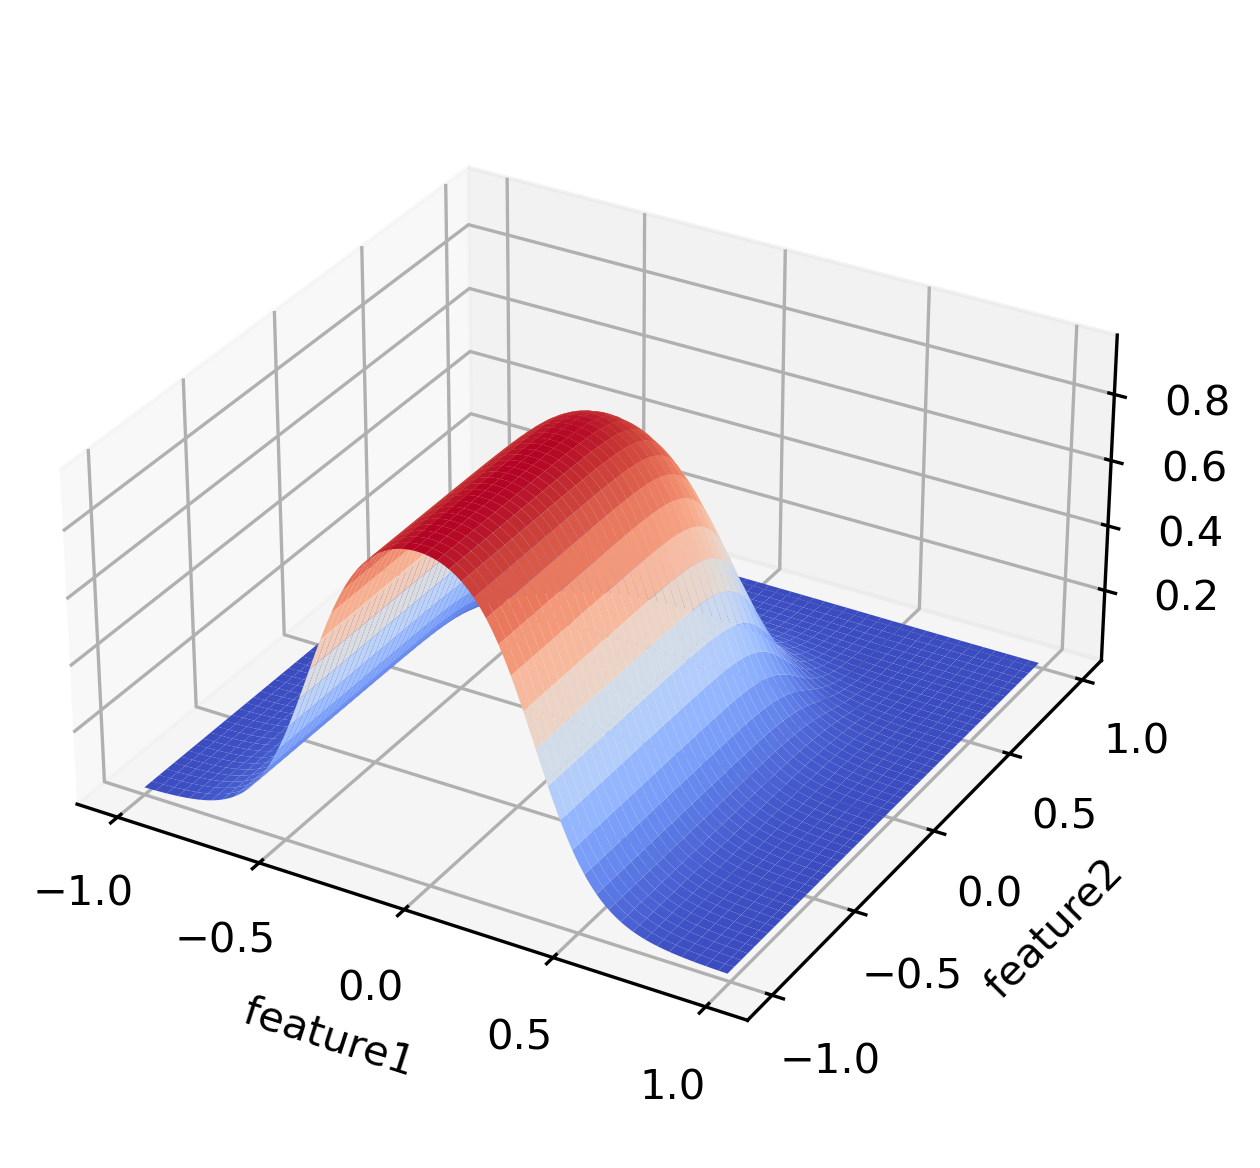

In [68]:
ax = plt.figure(dpi=300).add_subplot(projection='3d')
# ax.set_box_aspect(1.32/1.76)
ax.set_box_aspect([1,1,0.5])
ax.plot_surface(x1m, x2m, (y1).detach().numpy(),cmap=plt.cm.coolwarm)
plt.xlabel('feature1')
plt.ylabel('feature2')
ax.set_zlabel('P')
plt.show()

E:\Users\mxxxc\AppData\Local\Temp\ipykernel_704236\1886649447.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig1)


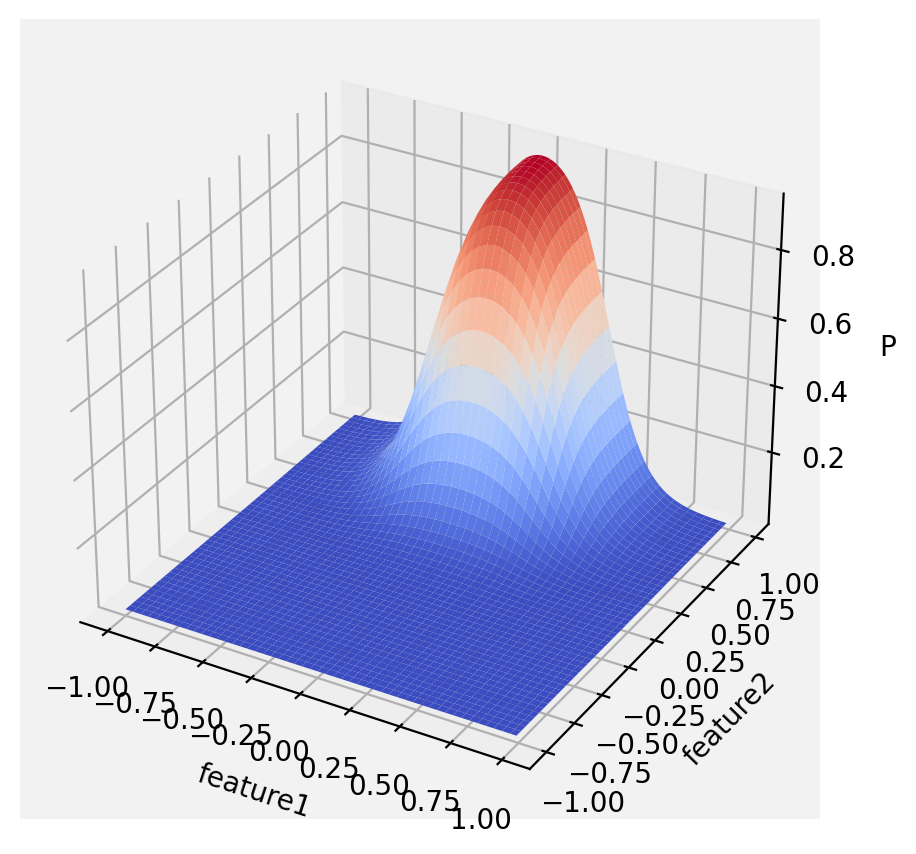

In [173]:
fig1=plt.figure(dpi=200)
ax=Axes3D(fig1)
ax.plot_surface(x1m, x2m, (y2).detach().numpy(),cmap=plt.cm.coolwarm)
plt.xlabel('feature1')
plt.ylabel('feature2')
ax.set_zlabel('P')
plt.show()

In [116]:
y3.max()

tensor(0.9973, dtype=torch.float64, grad_fn=<MaxBackward1>)

In [112]:
np.meshgrid(x1)

[array([-1.0000000e+00, -9.9000000e-01, -9.8000000e-01, -9.7000000e-01,
        -9.6000000e-01, -9.5000000e-01, -9.4000000e-01, -9.3000000e-01,
        -9.2000000e-01, -9.1000000e-01, -9.0000000e-01, -8.9000000e-01,
        -8.8000000e-01, -8.7000000e-01, -8.6000000e-01, -8.5000000e-01,
        -8.4000000e-01, -8.3000000e-01, -8.2000000e-01, -8.1000000e-01,
        -8.0000000e-01, -7.9000000e-01, -7.8000000e-01, -7.7000000e-01,
        -7.6000000e-01, -7.5000000e-01, -7.4000000e-01, -7.3000000e-01,
        -7.2000000e-01, -7.1000000e-01, -7.0000000e-01, -6.9000000e-01,
        -6.8000000e-01, -6.7000000e-01, -6.6000000e-01, -6.5000000e-01,
        -6.4000000e-01, -6.3000000e-01, -6.2000000e-01, -6.1000000e-01,
        -6.0000000e-01, -5.9000000e-01, -5.8000000e-01, -5.7000000e-01,
        -5.6000000e-01, -5.5000000e-01, -5.4000000e-01, -5.3000000e-01,
        -5.2000000e-01, -5.1000000e-01, -5.0000000e-01, -4.9000000e-01,
        -4.8000000e-01, -4.7000000e-01, -4.6000000e-01, -4.50000

In [33]:
X1,X2 = X[:,-1],X[:,-2]

In [129]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

TypeError: 'norm' must be an instance of matplotlib.colors.Normalize or None, not a numpy.ndarray

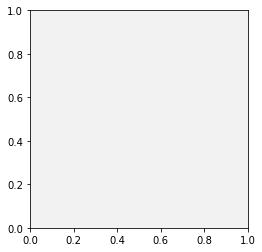

In [91]:
plt.imshow(x1,x2,y1.detach().numpy())